# Project: Female Labor Force Participation and Economic Strength

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This project was originally conceptualized by examining the various datasets available at [Gapminder](https://www.gapminder.org/data/). The original concept was to identify characteristics that contribute to a country's economic strength. It was known that female labor force participation is often associated with economic strength and so the goal was to determine whether this could be identified within the available data. 

### Indicators Rationale

#### Income (GDP) per person (fixed 2000 USD)
- **Definition:** Gross Domestic Product per capita in constant 2000 USD. The inflation but not the differences in the cost of living between countries has been taken into account.
- **Source:** [World Bank](http://www.worldbank.org/)
- **Rationale:** Identified as a standardized metric of economic strength across countries. 
- **df Column:** income

#### Female employees age 15+ (% of population)
- **Definition:** Percentage of female population, age above 15, that has been employed during the given year.
- **Source:** [International Labour Organization](http://www.ilo.org/emppolicy/lang--en/index.htm)
- **Rationale:** Identified as a metric to capture female participation in the workforce.
- **df Column:** employ_above_15

#### Female agricultural workers (% of all female labor)
- **Definition:** Percentage of all female labor that works in agriculture sector.
- **Source:** [International Labour Organization](http://www.ilo.org/emppolicy/lang--en/index.htm)
- **Rationale:** Included to allow for examination of the relationship between employment sector and economic strength.
- **df Column:** agr

#### Female industry workers (% of all female labor)
- **Definition:** Percentage of all female labor that works in industy sector.
- **Source:** [International Labour Organization](http://www.ilo.org/emppolicy/lang--en/index.htm)
- **Rationale:** Included to allow for examination of the relationship between employment sector and economic strength.
- **df Column:** ind

#### Female service workers (% of all female labor)
- **Definition:** Percentage of all female labor that works in service sector.
- **Source:** [International Labour Organization](http://www.ilo.org/emppolicy/lang--en/index.htm)
- **Rationale:** Included to allow for examination of the relationship between employment sector and economic strength.
- **df Column:** ser

#### Mean years in school (women 25 and older)
- **Definition:** The average number of years of school attended by all people in the age and gender group specified, including primary, secondary and tertiary education.
- **Source:** [Institute for Health Metrics and Evaluation](http://www.healthmetricsandevaluation.org/)
- **Rationale:** Included to allow for examination of the relationship between educational achievement (up to tertiary) and economic strength, and the relationship between educational achievement and workforce participation, including sector.
- **df Column:** education

### Date Rationale
The original datasets were examined for date ranges. Available data varied between datasets with date ranges of 1960 to 2011 for GDP information to a range of 1980 to 2007 for the employment sectors. Originally data for 2007 was intended, as the most current information, but further examination identified that 2006 contained less missing data than 2007 and so 2006 was selected instead.

### Original Research Questions
The original questions conceived for the dataset were as follows:
1. Is female participation in the workforce related to economic strength?
2. Are there particular types of female employment that are more related to economic strength?
3. Do years of education participation relate to economic stregnth?
4. Is there a relationship between years of education participation and workforce participation?

### Additional Research
To examine the relationship between employment sector and the other variables, it was necessary to determine whether the three categories of employment sector (agriculture, industry and service) sufficiently captured female labor participation. Initial analysis (as outlined below) suggested that they did, but some results prevented a definitive conclusion. Further research was done to determine whether other insight regarding methodology for gathering the sets, or their intended use, could be identified. 

The International Labour Organization (ILO) working paper, [Female labour force participation in India and beyond](http://www.ilo.org/newdelhi/whatwedo/publications/WCMS_324621/lang--en/index.htm), authored by Ruchika Chaudhary and Sher Verick, became an instructional text for the remainder of this project. 

**The paper was able to confirm that:**
- GDP per capita is an accepted metric for a country's economic strength.
- The three sectors are the standard sectors used to capture areas of employment.
- There are known relationships between participation in education and workforce participation, as well as economic strength.

**The paper brought to light additional issues:**
- The log of GDP is often used for comparison, due to the data skew.
- The relationship between female labor force participation (FLFP) and economic strength (from a cross-country analysis) is varied in findings, but has been suggested to be U-shaped, such that greater FLFP is associated with both higher and lower economic strength.
- As a result of the above, FLFP is not always considered positive as women may have been forced into the workforce as a result of family finacial pressure, especially in times of economic downturn, and, this participation is often at lower rates and less desirable working conditions than men. 
- Greater years of participation in education may decrease employment rates among younger women, but typically education encourages their employment participation after completion, and, increased education is also typically associated with more favorable employment outcomes/conditions. 
- Typical country economic development shows that greater participation in industry (as compared to agriculture) sector jobs, and recently service jobs is a sign of economic health. 

**Other statistics:**
- Women’s participation in the labour market has remained relatively stable from 1993 to 2013 (suggesting that a selection of 2006 data compared to 2007 should not strongly influence the conclusions drawn as a result of recency).
- Women account for approximately 40% of the global labor force.
- FLFP rates vary substantially across global regions. 

### Amended Research Questions 
As a result of the information found in the paper, some of the original questions were modified, and additional questions were added, resulting in this final question set:
1. How does economic strength vary across the globe?
2. How does women's participation in the workforce vary across the globe?
3. How does women's participation in education vary across the globe?
4. Does the selected data support a theory of a U-shaped relationship between FLFP and economic strength?
5. Does the data show a relationship between employment sector and economic strength?
6. Is there a positive relationship between economic strength and education participation?
7. Does the selected data show relationships between education participation and overall FLFP, as well as in the three employment sectors?

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

All sets of data were contained in separate spreadsheets of varying date ranges and countries for which data was available. A csv containing the country list and the relevant metric for 2006 in each dataset was created using Excel. 

### Joining Datasets and Managing Missing Data Rationale
Decisions were required on how to join these sets as well as how to handle missing values. Joining methods were considered at the same time as considering missing values due to the impact of the joining methods on data loss. The salient question was, should inner joins be used for all sets to only preserve the common values, or, should joining methods encourage the preservation of data, even if it isn't shared across all variables?

This resource on [missing values](http://www.mosaicdatascience.com/blogs/data-science-design-pattern-3-handling-null-values/) was considered informative in aiding the decision making process. Specifically, it was recommended that the managing of missing values be informed by:
- The nature of the missing values: whether they are missing completely at random (MCAR), missing at random (MAR), or missing not at random (MNAR) - a different approach for handling null values is recommended for each.
- An understanding that different approaches may be needed for different variables within a dataset, and more than one approach may be applied to a single variable. 
- Appropriate use of null deletion such that it is used when: "You are confident that the null values are MCAR," and, "The data are sufficiently abundant, or the records containing nulls are sufficiently sparse, so that your sample size will not change substantially as a result of deleting those records."

It was identified that in this dataset missing data is missing not at random (MNAR). It was hypothesized that countries that were less economically developed would be more likely to have missing data. In an effort to increase the representation of less economically developed countries, and in recognition of a relatively small initial dataset, it was determined that if a country had a data point in at least one of the categories it would be included and missing values would be managed on a pair-wise, as opposed to case-wise deletion process, as needed. Thus, the most appropriate joining method was considered to be an outer join.

### Import and Join Datasets
**Income per Person:**

In [3]:
df_income = pd.read_csv('GDPpercapita.csv')
df_income.head(10)

,country,income
0,Abkhazia,NaN
1,Afghanistan,NaN
2,Akrotiri and Dhekelia,NaN
3,Albania,1594.495067
4,Algeria,2124.957754
5,American Samoa,NaN
6,Andorra,21595.395480
7,Angola,473.136343
8,Anguilla,NaN
9,Antigua and Barbuda,12452.282040


In [5]:
df_income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Data columns (total 2 columns):
country    275 non-null object
income     193 non-null float64
dtypes: float64(1), object(1)
memory usage: 4.4+ KB


In [6]:
193 / 275

0.7018181818181818

275 countries are provided in the income dataset but approximately 30% of them have missing data. 

**Female employment participation:**

In [7]:
df_employ = pd.read_csv('employ_above_15.csv')
df_employ.head()

,country,employ_above_15
0,Afghanistan,26.200001
1,Albania,41.900002
2,Algeria,30.500000
3,Angola,69.199997
4,Argentina,45.799999


In [8]:
df_employ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 2 columns):
country            178 non-null object
employ_above_15    178 non-null float64
dtypes: float64(1), object(1)
memory usage: 2.9+ KB


There are no missing values in this dataset, but it does not contain the same number of countries as the income dataset. The employment data is of `float` type so it does not need to be converted. It is noted that percentage is written out of 100 as opposed to a decimal value.

**Female agricultural sector employment:**

In [3]:
df_agr = pd.read_csv('agr_employ.csv')
df_agr.head(10)

,country,agr
0,Algeria,NaN
1,American Samoa,NaN
2,Anguilla,NaN
3,Antigua and Barbuda,NaN
4,Argentina,0.300000
5,Armenia,46.099998
6,Aruba,NaN
7,Australia,2.400000
8,Austria,5.700000
9,Azerbaijan,36.700001


In [10]:
df_agr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 2 columns):
country    162 non-null object
agr        85 non-null float64
dtypes: float64(1), object(1)
memory usage: 2.6+ KB


In [11]:
85 / 162

0.5246913580246914

The agriculture sector dataset contains an even smaller list of countries than the previous two and has data for approximately half of the listed countries. The `float` datatype and the formatting of percent remain consistent.

**Female industrial sector employment:**

In [4]:
df_ind = pd.read_csv('ind_employ.csv')
df_ind.head(10)

,country,ind
0,Algeria,NaN
1,American Samoa,NaN
2,Anguilla,NaN
3,Antigua and Barbuda,NaN
4,Argentina,10.9
5,Armenia,9.5
6,Aruba,NaN
7,Australia,9.1
8,Austria,13.4
9,Azerbaijan,9.0


In [13]:
df_ind.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163 entries, 0 to 162
Data columns (total 2 columns):
country    162 non-null object
ind        85 non-null float64
dtypes: float64(1), object(1)
memory usage: 2.6+ KB


Based on the fact that the number of countries and the amount of available data for the agricultural and industrial sectors are the same, this suggests that the available data is consistent across countries. 

The `float` datatype and the formatting of percent remain consistent.

**Female services employment:**

In [5]:
df_ser = pd.read_csv('ser_employ.csv')
df_ser.head(10)

,country,ser
0,Algeria,NaN
1,American Samoa,NaN
2,Anguilla,NaN
3,Antigua and Barbuda,NaN
4,Argentina,88.500000
5,Armenia,44.500000
6,Aruba,NaN
7,Australia,88.199997
8,Austria,80.900002
9,Azerbaijan,54.299999


In [15]:
df_ser.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163 entries, 0 to 162
Data columns (total 2 columns):
country    162 non-null object
ser        85 non-null float64
dtypes: float64(1), object(1)
memory usage: 2.6+ KB


In [7]:
df_sector = df_agr.merge(df_ind, on='country', how='inner')
df_sector = df_sector.merge(df_ser, on='country', how='inner')
df_sector.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162 entries, 0 to 161
Data columns (total 4 columns):
country    162 non-null object
agr        85 non-null float64
ind        85 non-null float64
ser        85 non-null float64
dtypes: float64(3), object(1)
memory usage: 6.3+ KB


Once again, the datatypes and percent formatting remain consistent.

The join info confirms that the employment sector data is available for the same 85 countries. This ensures that while a smaller dataset, all employment sector comparisons will be across the same countries. 

#### Confirm completeness employment sector data
The employment sectors were examined to determine whether they typically captured the majority of the employment participation.

In [16]:
df_agr_nona = df_agr.dropna().rename(columns={'agr': 'type'})
df_ind_nona = df_ind.dropna().rename(columns={'ind': 'type'})
df_ser_nona = df_ser.dropna().rename(columns={'ser': 'type'})
total_type = df_agr_nona + df_ind_nona + df_ser_nona
total_type.head()

,country,type
4,ArgentinaArgentinaArgentina,99.700000
5,ArmeniaArmeniaArmenia,100.099998
7,AustraliaAustraliaAustralia,99.699997
8,AustriaAustriaAustria,100.000001
9,AzerbaijanAzerbaijanAzerbaijan,100.000000


The initial examination suggested that the three sectors captured the majority of employment and that values over 100% may be due to rounding errors. 

An examination of the range of data was conducted by running a hist plot.

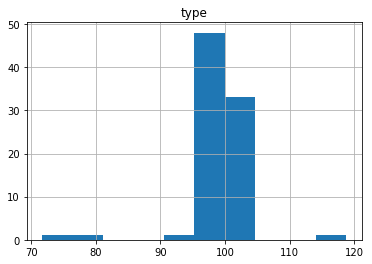

In [17]:
total_type.hist();

It showed a number of countries that were below 99%, and at least one that was over. An examination of these countries was conducted.

In [18]:
total_type.query('type < 99')

,country,type
63,IcelandIcelandIceland,97.500001
72,JapanJapanJapan,98.900002
87,MaldivesMaldivesMaldives,94.800001
129,SenegalSenegalSenegal,79.900000
137,Sri LankaSri LankaSri Lanka,71.700002
158,West Bank and GazaWest Bank and GazaWest Bank ...,98.399999


No clear pattern was identified for countries with total employment participation below 99%. However, because the ILO report only used these three categories in it's examinations, it was determined that they were sufficient without looking for additional data. 

In [19]:
total_type.query('type > 101')

,country,type
56,GuatemalaGuatemalaGuatemala,118.799999


Additional examination was conducted to determine how the three sectors combined for Guatemala.

In [21]:
print(df_agr.query('country == "Guatemala"'), '\n')
print(df_ind.query('country == "Guatemala"'), '\n')
print(df_ser.query('country == "Guatemala"'))

      country   agr
56  Guatemala  19.1 

      country   ind
56  Guatemala  24.6 

      country        ser
56  Guatemala  75.099998


A consideration was made to exclude Guatemala as a potential error, but it was realized that it is possible for a worker to participate in more than one sector and this may be the reason for the overage. Given that information on data gathering methodology was not identified, it was decided to retain Guatemala as each of the sectors were only intended to be considered individually, and not as a combined value.

**Female average years of education:**

In [22]:
df_edu = pd.read_csv('years_education.csv')
df_edu.head(10)

,country,education
0,Afghanistan,0.3
1,Albania,8.9
2,Algeria,3.8
3,Angola,2.5
4,Antigua and Barbuda,11.9
5,Argentina,9.8
6,Armenia,11.0
7,Australia,11.3
8,Austria,10.7
9,Azerbaijan,10.9


In [23]:
df_edu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175 entries, 0 to 174
Data columns (total 2 columns):
country      175 non-null object
education    175 non-null float64
dtypes: float64(1), object(1)
memory usage: 2.8+ KB


There is no missing data for this dataset, but the number of countries is less than for the income dataset. The `float` datatype and the formatting of percent remain consistent.

#### Merge the datasets
As stated above, outer joins were used for all sets to preserve the maximum data and conduct further examination from this point.

In [24]:
df = df_income.merge(df_employ, left_on='country', right_on='country', how='outer')
df = df.merge(df_agr, on='country', how='outer')
df = df.merge(df_ind, on='country', how='outer')
df = df.merge(df_ser, on='country', how='outer')
df = df.merge(df_edu, on='country', how='outer')
df.head(15)

,country,income,employ_above_15,agr,ind,ser,education
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,NaN,26.200001,NaN,NaN,NaN,0.3
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,1594.495067,41.900002,NaN,NaN,NaN,8.9
4,Algeria,2124.957754,30.500000,NaN,NaN,NaN,3.8
5,American Samoa,NaN,NaN,NaN,NaN,NaN,NaN
6,Andorra,21595.395480,NaN,NaN,NaN,NaN,NaN
7,Angola,473.136343,69.199997,NaN,NaN,NaN,2.5
8,Anguilla,NaN,NaN,NaN,NaN,NaN,NaN
9,Antigua and Barbuda,12452.282040,NaN,NaN,NaN,NaN,11.9


#### Manage missing values

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 288 entries, 0 to 287
Data columns (total 7 columns):
country            287 non-null object
income             193 non-null float64
employ_above_15    178 non-null float64
agr                85 non-null float64
ind                85 non-null float64
ser                85 non-null float64
education          175 non-null float64
dtypes: float64(6), object(1)
memory usage: 18.0+ KB


Using outer joins increased the original country list from 275 to 287, however, the first few rows of the dataframe showed that some countries were missing data for all variables. It was determined that all countries listed with no data for the other variables would be deleted using the `thresh=2` argument with `dropna`, retaining all countries with at least one piece of data.

In [26]:
df.dropna(thresh=2, inplace=True)
df.head()

,country,income,employ_above_15,agr,ind,ser,education
1,Afghanistan,NaN,26.200001,NaN,NaN,NaN,0.3
3,Albania,1594.495067,41.900002,NaN,NaN,NaN,8.9
4,Algeria,2124.957754,30.500000,NaN,NaN,NaN,3.8
6,Andorra,21595.395480,NaN,NaN,NaN,NaN,NaN
7,Angola,473.136343,69.199997,NaN,NaN,NaN,2.5


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215 entries, 1 to 284
Data columns (total 7 columns):
country            215 non-null object
gdp                193 non-null float64
employ_above_15    178 non-null float64
agr                85 non-null float64
ind                85 non-null float64
ser                85 non-null float64
education          175 non-null float64
dtypes: float64(6), object(1)
memory usage: 13.4+ KB


This resulted in a final set of 215 countries, the majority of which had `income`, `employ_above_15` and `education` data, and 85 countries that had employment sector information. 

**Comparison across global regions**
For ease of future analyis, the data was categorized into global regions based on [classifications by the United Nations](https://en.wikipedia.org/wiki/United_Nations_Regional_Groups) (UN).

In [27]:
df_regions = pd.read_csv('country_regions.csv')
df_regions.head()

,country,region
0,Algeria,Africa
1,Angola,Africa
2,Benin,Africa
3,Botswana,Africa
4,Burkina Faso,Africa


In [28]:
df = df.merge(df_regions, on='country', how='left')
df.head()

,country,income,employ_above_15,agr,ind,ser,education,region
0,Afghanistan,NaN,26.200001,NaN,NaN,NaN,0.3,Asia-Pacific
1,Albania,1594.495067,41.900002,NaN,NaN,NaN,8.9,Eastern Europe
2,Algeria,2124.957754,30.500000,NaN,NaN,NaN,3.8,Africa
3,Andorra,21595.395480,NaN,NaN,NaN,NaN,NaN,Western Europe and Other
4,Angola,473.136343,69.199997,NaN,NaN,NaN,2.5,Africa


The dataframe was inspected for missing `region` values.

In [29]:
no_region = df[df.region.isnull()]
no_region

,country,income,employ_above_15,agr,ind,ser,education,region
19,Bermuda,65430.601310,NaN,NaN,NaN,NaN,NaN,NaN
25,Brunei,18745.804770,54.900002,NaN,NaN,NaN,NaN,NaN
32,Cape Verde,1613.584414,42.400002,NaN,NaN,NaN,3.1,NaN
33,Cayman Islands,NaN,NaN,1.000000,3.600000,95.500000,NaN,NaN
36,Channel Islands,42994.345910,NaN,NaN,NaN,NaN,NaN,NaN
41,"Congo, Dem. Rep.",94.769735,51.000000,NaN,NaN,NaN,3.6,NaN
42,"Congo, Rep.",1150.392879,52.599998,NaN,NaN,NaN,4.8,NaN
44,Cote d'Ivoire,572.297134,38.200001,NaN,NaN,NaN,1.7,NaN
69,Greenland,20556.634740,NaN,NaN,NaN,NaN,NaN,NaN
71,Guadeloupe,NaN,39.000000,NaN,NaN,NaN,NaN,NaN


In [30]:
df.region.isnull().sum()

39

In [ ]:
no_region.to_csv('no_region.csv', index=False)

39 countries were identified as having missing data. Based on visual inspection it was identified that some of the missing data was due to a lack of consistency in country names across datasets and some may be due to lack of UN participation/recognition for countries. The original resource was consulted to populate the region values for these countries. 

In [31]:
missing_region = pd.read_csv('missing_region.csv')
missing_region.head()

,country,region
0,Bermuda,non-UN
1,Brunei,Asia-Pacific
2,Cape Verde,Africa
3,Cayman Islands,non-UN
4,Central African Rep.,Africa


In [32]:
df = df.merge(missing_region, on='country', how='left', suffixes=['', '_add'])
df.head()

,country,income,employ_above_15,agr,ind,ser,education,region,region_add
0,Afghanistan,NaN,26.200001,NaN,NaN,NaN,0.3,Asia-Pacific,NaN
1,Albania,1594.495067,41.900002,NaN,NaN,NaN,8.9,Eastern Europe,NaN
2,Algeria,2124.957754,30.500000,NaN,NaN,NaN,3.8,Africa,NaN
3,Andorra,21595.395480,NaN,NaN,NaN,NaN,NaN,Western Europe and Other,NaN
4,Angola,473.136343,69.199997,NaN,NaN,NaN,2.5,Africa,NaN


In [33]:
df.region.fillna(df.region_add, inplace=True)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215 entries, 0 to 214
Data columns (total 9 columns):
country            215 non-null object
income             193 non-null float64
employ_above_15    178 non-null float64
agr                85 non-null float64
ind                85 non-null float64
ser                85 non-null float64
education          175 non-null float64
region             215 non-null object
region_add         39 non-null object
dtypes: float64(6), object(3)
memory usage: 16.8+ KB


In [35]:
df.drop('region_add', axis=1, inplace=True)
df.head(1)

,country,income,employ_above_15,agr,ind,ser,education,region
0,Afghanistan,NaN,26.200001,NaN,NaN,NaN,0.3,Asia-Pacific


#### Inspect missing values by region

As will be shown, it was discovered that the amount of missing data across the variables differed substantially depending on the region. Data was more likely to be missing from countries that were not in the UN. In addition, a trend was identified where more developed regions were less to have missing data, confirming one of the previously hypthosized contributors to missing data. Both UN participation and economic development may influence the availability of data by influencing whether data is included. For example, Taiwan is not recognized by China as a separate entity and is there is not included in the UN, which may result in ineligibility for some assessment measures. Countries in less developed regions may also possess less infrastructure to support their participation in the reporting such measures, or may lack political will to do so. These considerations further supported the need for alternatives to null deletion for managing missing values. 

An alternative method of managing missing values is the use of naive surrogates, or substitution of central-values. This is recommended [when](http://www.mosaicdatascience.com/blogs/data-science-design-pattern-3-handling-null-values/):
1. "You are confident that the sample comes from a unimodal, symmetric distribution that has a well-defined mean and variance."
2. "The data is abundant."
3. "The number of null values is small."
4. "The distribution has a small variance (so that most of its values are near the mean)"

Given that the amount of missing data varies across regions, and that UN region groupings appear to follow some pattern of economic development, it was determined that missing data would be managed per region for each variable. 

The data were inspected to determine if the use of naive surrogates was an appropriate method to manage missing values. 

In [36]:
def percent_missing_data(df):
    return df.isnull().sum()/(df.isnull().sum() + df.count())*100

**Africa**

In [37]:
africa = df.query('region == "Africa"')
africa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54 entries, 2 to 206
Data columns (total 8 columns):
country            54 non-null object
income             51 non-null float64
employ_above_15    50 non-null float64
agr                7 non-null float64
ind                7 non-null float64
ser                7 non-null float64
education          52 non-null float64
region             54 non-null object
dtypes: float64(6), object(2)
memory usage: 3.8+ KB


In [38]:
percent_missing_data(africa)

country             0.000000
income              5.555556
employ_above_15     7.407407
agr                87.037037
ind                87.037037
ser                87.037037
education           3.703704
region              0.000000
dtype: float64

The majority of data was missing from the employment sectors for countries in Africa. Therefore, the use of naive surrogates was not appropriate for data for this region. `income`, `employ_above_15` and `education` were inspected for their suitability for naive surrogates.

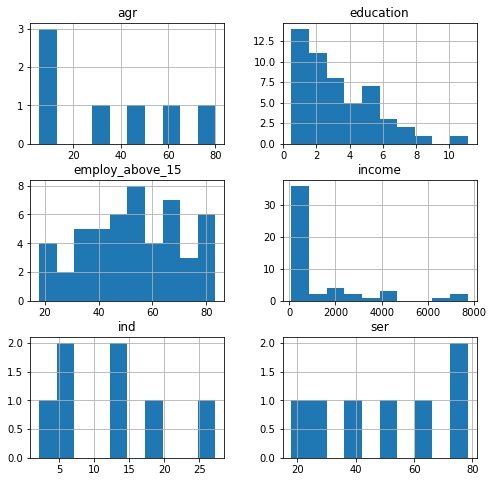

In [39]:
africa.hist(figsize=(8, 8));

Both `income` and `education` were substantially skewed and therefore did not meet the criteria for the use of naive surrogates. However, `employ_above_15` appeared to sufficiently satisfy the criteria. 

**Asia-Pacific**

In [40]:
asia_pac = df.query('region == "Asia-Pacific"')
asia_pac.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57 entries, 0 to 213
Data columns (total 8 columns):
country            57 non-null object
income             50 non-null float64
employ_above_15    45 non-null float64
agr                13 non-null float64
ind                13 non-null float64
ser                13 non-null float64
education          47 non-null float64
region             57 non-null object
dtypes: float64(6), object(2)
memory usage: 4.0+ KB


In [41]:
percent_missing_data(asia_pac)

country             0.000000
income             12.280702
employ_above_15    21.052632
agr                77.192982
ind                77.192982
ser                77.192982
education          17.543860
region              0.000000
dtype: float64

Again, the employment sector variables had too much missing data to use naive surrogates, but `income`, `employ_above_15` and `education` had potential.

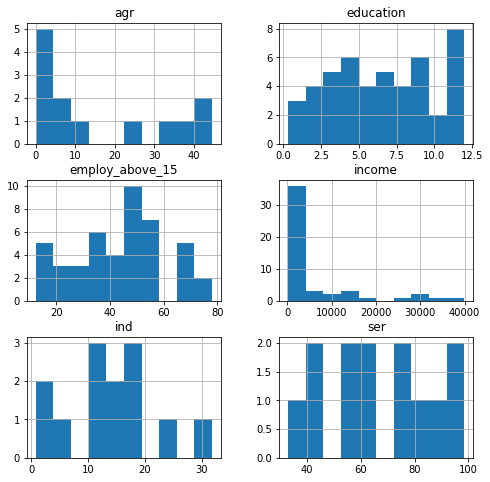

In [42]:
asia_pac.hist(figsize=(8, 8));

Given that the missing values for `education` and `employ_above_15` constituted approximately 20% of the countries in the region, it was determined that there was too much variability in the data to use naive surrogates. `income` was also highly skewed. 

**Eastern Europe**

In [43]:
east_eur = df.query('region == "Eastern Europe"')
east_eur.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 1 to 207
Data columns (total 8 columns):
country            25 non-null object
income             23 non-null float64
employ_above_15    22 non-null float64
agr                18 non-null float64
ind                18 non-null float64
ser                18 non-null float64
education          23 non-null float64
region             25 non-null object
dtypes: float64(6), object(2)
memory usage: 1.8+ KB


In [44]:
percent_missing_data(east_eur)

country             0.0
income              8.0
employ_above_15    12.0
agr                28.0
ind                28.0
ser                28.0
education           8.0
region              0.0
dtype: float64

The relatively small amount of missing data suggested that use of naive surrogates may have been appropriate for this region.

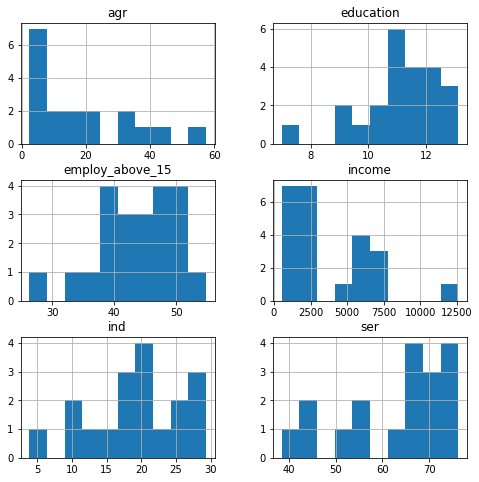

In [45]:
east_eur.hist(figsize=(8, 8));

Both `education` (using the median) and `employ_above_15` appeared to sufficiently meet criteria, whereas `income` was too skewed. 

While it may have been appropriate to use naive surrogates for `ind`, this was not appropriate for the other sectors. It was determined that it was more desirable to maintain a full comparable set of data for the three sectors, that is, only use countries that had values for all three, so no substitution was conducted. 

**Latin America and Caribbean**

In [46]:
lat_am = df.query('region == "Latin America and Caribbean"')
lat_am.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35 entries, 5 to 214
Data columns (total 8 columns):
country            35 non-null object
income             32 non-null float64
employ_above_15    27 non-null float64
agr                17 non-null float64
ind                17 non-null float64
ser                17 non-null float64
education          28 non-null float64
region             35 non-null object
dtypes: float64(6), object(2)
memory usage: 2.5+ KB


In [47]:
percent_missing_data(lat_am)

country             0.000000
income              8.571429
employ_above_15    22.857143
agr                51.428571
ind                51.428571
ser                51.428571
education          20.000000
region              0.000000
dtype: float64

Because of the large amounts of missing data, it was expected that substitution would not be possible, but a check was made to confirm this.

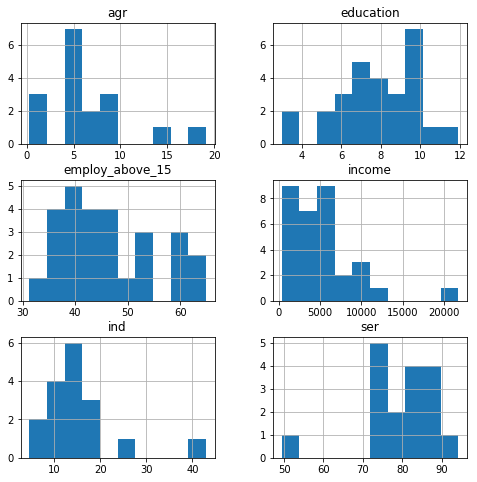

In [48]:
lat_am.hist(figsize=(8, 8));

Based on this information, no substitutions were planned for missing values.

**Western Europe and Other**

In [49]:
west_eur_other = df.query('region == "Western Europe and Other"')
west_eur_other.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29 entries, 3 to 196
Data columns (total 8 columns):
country            29 non-null object
income             29 non-null float64
employ_above_15    25 non-null float64
agr                24 non-null float64
ind                24 non-null float64
ser                24 non-null float64
education          23 non-null float64
region             29 non-null object
dtypes: float64(6), object(2)
memory usage: 2.0+ KB


In [50]:
percent_missing_data(west_eur_other)

country             0.000000
income              0.000000
employ_above_15    13.793103
agr                17.241379
ind                17.241379
ser                17.241379
education          20.689655
region              0.000000
dtype: float64

Due to the relatively low amounts of missing data it was determined that substitution may be possible. 

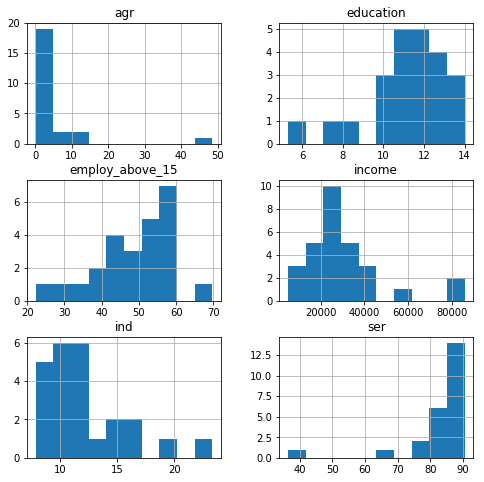

In [51]:
west_eur_other.hist(figsize=(8, 8));

`income` was reasonably symmetrical and therefore appropriate for use of naive surrogates. `education` was also reasonably symmetrical but the median was used as a substitute to minimize the impact of the left tail. 

**non-UN**

In [52]:
non_un = df.query('region == "non-UN"')
non_un.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15 entries, 19 to 201
Data columns (total 8 columns):
country            15 non-null object
income             8 non-null float64
employ_above_15    9 non-null float64
agr                6 non-null float64
ind                6 non-null float64
ser                6 non-null float64
education          2 non-null float64
region             15 non-null object
dtypes: float64(6), object(2)
memory usage: 1.1+ KB


In [53]:
percent_missing_data(non_un)

country             0.000000
income             46.666667
employ_above_15    40.000000
agr                60.000000
ind                60.000000
ser                60.000000
education          86.666667
region              0.000000
dtype: float64

Based on the amount of missing data, it was not appropriate to substitute for any of these variables. 

#### Check duplicate data

In [54]:
df.nunique()

country            215
income             193
employ_above_15    145
agr                 70
ind                 70
ser                 79
education          102
region               6
dtype: int64

There were no duplicate countries, which was expected based on the datasets used. While there were duplicate values in all other variables, this was not of concern because the values for each of this variables for each row/country are independent of the value for another country.

#### Normality checks
Because scatterplots and correlations are intended as some of the analysis tools, the overall variables (as opposed to by region) were examined for their normality.

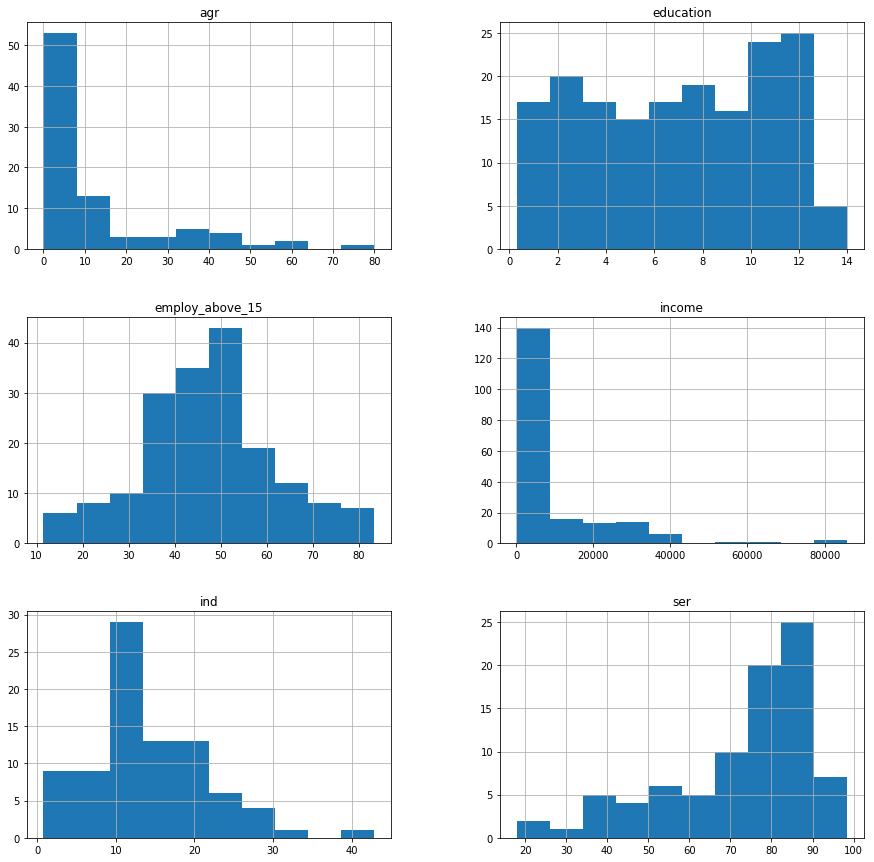

In [55]:
df.hist(figsize=(15, 15));

In [56]:
print('income: ', df.income.skew(), df.income.kurtosis())
print('employ: ', df.employ_above_15.skew(), df.employ_above_15.kurtosis())
print('agr: ', df.agr.skew(), df.agr.kurtosis())
print('ind: ', df.ind.skew(), df.ind.kurtosis())
print('ser: ', df.ser.skew(), df.ser.kurtosis())
print('education: ', df.education.skew(), df.education.kurtosis())

income:  2.639013336851581 8.773337394671469
employ:  0.05955560836899337 0.12360310962985954
agr:  1.934606068186565 3.500775756422366
ind:  0.8949231530911632 1.6623344542647573
ser:  -1.0756056182380256 0.5751799419556471
education:  -0.09499617812394506 -1.2796036280929386


[Acceptable ranges](https://www.researchgate.net/post/What_is_the_acceptable_range_of_skewness_and_kurtosis_for_normal_distribution_of_data) for skew and kurtosis are typically +/- 2. 

- **income** was incredibly skewed to the right, ranging from 0 to 8000 (which confirms use of log-gdp in the ILO report)
- **employ_above_15** and **education** fell within acceptable limits
- **agr** fell just inside of acceptable measures for skewness, but well outside of them for kurtosis
- **ind** was skewed to the right and **ser** was skewed to the left but both fell within acceptable limits

Both `income` and `agr` were identified as appropriate candidates for log transformation. It was further noted that if the transformation sufficiently corrected the skew for `income` that the use of naive surrogates might appropriate for some of the regions.

Before completing the transformations, the data was saved for future reference.

In [57]:
df.to_csv('raw_combined_df.csv', index=False)

### Data Cleaning
#### `income` Log Transformation

Because the original log transformation created negative values for `NaN` and 0 - creating further analysis complications, a function was created to manage these separately.

In [58]:
df = pd.read_csv('raw_combined_df.csv')
df.head()

,country,income,employ_above_15,agr,ind,ser,education,region
0,Afghanistan,NaN,26.200001,NaN,NaN,NaN,0.3,Asia-Pacific
1,Albania,1594.495067,41.900002,NaN,NaN,NaN,8.9,Eastern Europe
2,Algeria,2124.957754,30.500000,NaN,NaN,NaN,3.8,Africa
3,Andorra,21595.395480,NaN,NaN,NaN,NaN,NaN,Western Europe and Other
4,Angola,473.136344,69.199997,NaN,NaN,NaN,2.5,Africa


In [59]:
def conditional_fillna(x):
    if x == np.nan:
        x = np.nan
    if x == 0:
        x = 0
    else:
        x = np.log(x)
    return x

In [60]:
df['log_income'] = df.income.apply(conditional_fillna)
df.head()

,country,income,employ_above_15,agr,ind,ser,education,region,log_income
0,Afghanistan,NaN,26.200001,NaN,NaN,NaN,0.3,Asia-Pacific,NaN
1,Albania,1594.495067,41.900002,NaN,NaN,NaN,8.9,Eastern Europe,7.374312
2,Algeria,2124.957754,30.500000,NaN,NaN,NaN,3.8,Africa,7.661507
3,Andorra,21595.395480,NaN,NaN,NaN,NaN,NaN,Western Europe and Other,9.980235
4,Angola,473.136344,69.199997,NaN,NaN,NaN,2.5,Africa,6.159384


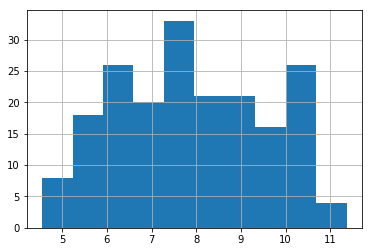

In [61]:
df.log_income.hist();

In [62]:
print(df.log_income.skew(), df.log_income.kurtosis())

0.08442981695014372 -1.0115948921880529


The log transformation substantially normalized the income data, confirming that it was an appropriate transformation for the data.

As a result of this more normal data, the `log_income` was examined for each region for normality.

In [63]:
regions_log_income = df.groupby('region')['log_income']

In [64]:
regions_log_income.mean()

region
Africa                          6.401944
Asia-Pacific                    7.625339
Eastern Europe                  7.923529
Latin America and Caribbean     8.220023
Western Europe and Other       10.153568
non-UN                          9.951948
Name: log_income, dtype: float64

In [65]:
regions_log_income.max() - regions_log_income.min()

region
Africa                         4.400319
Asia-Pacific                   5.402328
Eastern Europe                 3.167452
Latin America and Caribbean    4.034223
Western Europe and Other       2.813779
non-UN                         3.701956
Name: log_income, dtype: float64

In [66]:
regions_log_income.skew()

region
Africa                         0.747275
Asia-Pacific                   0.587070
Eastern Europe                 0.004488
Latin America and Caribbean   -0.440962
Western Europe and Other      -0.386101
non-UN                        -2.047662
Name: log_income, dtype: float64

In [67]:
regions_log_income.apply(lambda x: x.kurtosis())

region
Africa                        -0.474075
Asia-Pacific                  -0.615383
Eastern Europe                -0.858438
Latin America and Caribbean    0.194468
Western Europe and Other       1.679451
non-UN                         5.120240
Name: log_income, dtype: float64

Based on the above  analysis, `log_income` fell within appropriate normality ranges for all regions except `non-UN`. It was also suggested that the range for each was sufficiently small, with the exception of Asia-Pacific, to consider substitution. The number of missing values for `log_income` were also re-inspected for each region. 

The following determinations were made for each of the regions:
- Africa: use **mean** of `log_income` to substitute for missing values
- Asia-Pacific: **no substitution** completed due to the variability of `log_income` and the amount of missing data
- Eastern Europe: use **mean** of `log_income` to substitute for missing values
- Latin American and Caribbean: use **mean** of `log_income` to substitute for missing values
- Western Europe and Other: use **mean** of `log_income` to substitute for missing values

#### `agr` Log Transformation

In [68]:
df['log_agr'] = df.agr.apply(conditional_fillna)
df.head(10)

,country,income,employ_above_15,agr,ind,ser,education,region,log_income,log_agr
0,Afghanistan,NaN,26.200001,NaN,NaN,NaN,0.3,Asia-Pacific,NaN,NaN
1,Albania,1594.495067,41.900002,NaN,NaN,NaN,8.9,Eastern Europe,7.374312,NaN
2,Algeria,2124.957754,30.500000,NaN,NaN,NaN,3.8,Africa,7.661507,NaN
3,Andorra,21595.395480,NaN,NaN,NaN,NaN,NaN,Western Europe and Other,9.980235,NaN
4,Angola,473.136344,69.199997,NaN,NaN,NaN,2.5,Africa,6.159384,NaN
5,Antigua and Barbuda,12452.282040,NaN,NaN,NaN,NaN,11.9,Latin America and Caribbean,9.429659,NaN
6,Argentina,8717.176296,45.799999,0.300000,10.9,88.500000,9.8,Latin America and Caribbean,9.073051,-1.203973
7,Armenia,1253.813300,33.700001,46.099998,9.5,44.500000,11.0,Eastern Europe,7.133945,3.830813
8,Australia,24295.081380,54.599998,2.400000,9.1,88.199997,11.3,Western Europe and Other,10.098029,0.875469
9,Austria,26171.690910,49.400002,5.700000,13.4,80.900002,10.7,Western Europe and Other,10.172434,1.740466


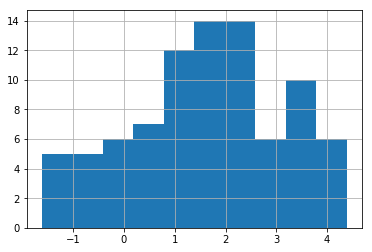

In [69]:
df.log_agr.hist();

In [70]:
print(df.log_agr.skew(), df.log_agr.kurtosis())

-0.2160712946936606 -0.6510757598921275


The log transformation substantially normalized the income data, confirming that it was an appropriate transformation for the data.

#### Complete substitutions

The following substitutions were completed for each region:

**Africa**
- `employ_above_15`: replaced NaN with mean
- `log_income`: replaced NaN with mean

**Asia-Pacific**
- no subsitutions to be completed

**Eastern Europe**
- `employ_above_15`: replaced NaN with mean
- `log_income`: replaced NaN with mean
- `education`: replaced Nan with median

**Latin America and Caribbean**
- `log_income`: replaced NaN with mean

**Western Europe and Other**
- `log_income`: replaced NaN with mean
- `education`: replaced Nan with median

In [71]:
region_mean = df.groupby('region')['log_income'].mean()
region_mean

region
Africa                          6.401944
Asia-Pacific                    7.625339
Eastern Europe                  7.923529
Latin America and Caribbean     8.220023
Western Europe and Other       10.153568
non-UN                          9.951948
Name: log_income, dtype: float64

Functions were written to conditionally replace the missing values based on region and target variable.

In [72]:
def fill_mean(df, name, column_target):
    region_mean = df.groupby('region')[column_target].mean()
    df['new_column'] = df.loc[df['region'] == name][column_target].fillna(region_mean.loc[name])
    df[column_target].fillna(df['new_column'], inplace=True)
    df.drop('new_column', axis=1, inplace=True)

In [73]:
def fill_median(df, name, column_target):
    region_median = df.groupby('region')[column_target].median()
    df['new_column'] = df.loc[df['region'] == name][column_target].fillna(region_median.loc[name])
    df[column_target].fillna(df['new_column'], inplace=True)
    df.drop('new_column', axis=1, inplace=True)

In [74]:
fill_mean(df, 'Africa', 'log_income')
fill_mean(df, 'Africa', 'employ_above_15')

The data was examined to confirmed that the substitutions were completed successfully.

In [75]:
df.loc[df['region'] == 'Africa'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54 entries, 2 to 206
Data columns (total 10 columns):
country            54 non-null object
income             51 non-null float64
employ_above_15    54 non-null float64
agr                7 non-null float64
ind                7 non-null float64
ser                7 non-null float64
education          52 non-null float64
region             54 non-null object
log_income         54 non-null float64
log_agr            7 non-null float64
dtypes: float64(8), object(2)
memory usage: 4.6+ KB


This was repeated for each of the regions.

In [76]:
fill_mean(df, 'Eastern Europe', 'log_income')
fill_mean(df, 'Eastern Europe', 'employ_above_15')
fill_median(df, 'Eastern Europe', 'education')

In [77]:
df.loc[df['region'] == 'Eastern Europe'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 1 to 207
Data columns (total 10 columns):
country            25 non-null object
income             23 non-null float64
employ_above_15    25 non-null float64
agr                18 non-null float64
ind                18 non-null float64
ser                18 non-null float64
education          25 non-null float64
region             25 non-null object
log_income         25 non-null float64
log_agr            18 non-null float64
dtypes: float64(8), object(2)
memory usage: 2.1+ KB


In [78]:
fill_mean(df, 'Latin America and Caribbean', 'log_income')

In [79]:
df.loc[df['region'] == 'Latin America and Caribbean'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35 entries, 5 to 214
Data columns (total 10 columns):
country            35 non-null object
income             32 non-null float64
employ_above_15    27 non-null float64
agr                17 non-null float64
ind                17 non-null float64
ser                17 non-null float64
education          28 non-null float64
region             35 non-null object
log_income         35 non-null float64
log_agr            17 non-null float64
dtypes: float64(8), object(2)
memory usage: 3.0+ KB


In [80]:
fill_mean(df, 'Western Europe and Other', 'log_income')
fill_median(df, 'Western Europe and Other', 'education')

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 10 columns):
country            215 non-null object
income             193 non-null float64
employ_above_15    185 non-null float64
agr                85 non-null float64
ind                85 non-null float64
ser                85 non-null float64
education          183 non-null float64
region             215 non-null object
log_income         201 non-null float64
log_agr            85 non-null float64
dtypes: float64(8), object(2)
memory usage: 16.9+ KB


The substitutions resulted in the following:
- Increased `log_income` values from 193 to 201
- Increased `employ_above_15` values from 178 to 185
- Increased `education` values from 175 to 183

#### Sort for alphabetical country order
Due to the merging of datasets, the countries were no longer listed in order and so they were sorted alphabetically.

In [82]:
df.tail()

,country,income,employ_above_15,agr,ind,ser,education,region,log_income,log_agr
210,"Korea, Rep.",NaN,48.599998,8.600000,16.0,75.300003,11.4,Asia-Pacific,NaN,2.151762
211,Kyrgyzstan,NaN,48.700001,35.400002,10.7,53.799999,11.0,Asia-Pacific,NaN,3.566712
212,Laos,NaN,78.099998,NaN,NaN,NaN,2.3,Asia-Pacific,NaN,NaN
213,"Yemen, Rep.",NaN,20.500000,NaN,NaN,NaN,0.6,Asia-Pacific,NaN,NaN
214,Saint Lucia,NaN,NaN,NaN,NaN,NaN,9.0,Latin America and Caribbean,8.220023,NaN


In [83]:
df.sort_values('country', inplace=True)
df.tail()

,country,income,employ_above_15,agr,ind,ser,education,region,log_income,log_agr
201,West Bank and Gaza,NaN,11.500000,34.299999,8.8,55.299999,7.3,non-UN,NaN,3.535145
203,Yemen,573.895709,NaN,NaN,NaN,NaN,NaN,Asia-Pacific,6.352448,NaN
213,"Yemen, Rep.",NaN,20.500000,NaN,NaN,NaN,0.6,Asia-Pacific,NaN,NaN
204,Zambia,372.083676,53.900002,NaN,NaN,NaN,4.8,Africa,5.919119,NaN
205,Zimbabwe,351.172047,58.799999,NaN,NaN,NaN,6.2,Africa,5.861276,NaN


The cleaned data was saved to a new file. 

In [84]:
df.to_csv('clean_df.csv', index=False)

<a id='eda'></a>
## Exploratory Data Analysis

An initial review of the relationships between the data was conducted and then each of the original questions was examined individually.

In [67]:
df = pd.read_csv('clean_df.csv')
df.head()

,country,income,employ_above_15,agr,ind,ser,education,region,log_income,log_agr
0,Afghanistan,NaN,26.200001,NaN,NaN,NaN,0.3,Asia-Pacific,NaN,NaN
1,Albania,1594.495067,41.900002,NaN,NaN,NaN,8.9,Eastern Europe,7.374312,NaN
2,Algeria,2124.957754,30.500000,NaN,NaN,NaN,3.8,Africa,7.661507,NaN
3,Andorra,21595.395480,NaN,NaN,NaN,NaN,11.6,Western Europe and Other,9.980235,NaN
4,Angola,473.136343,69.199997,NaN,NaN,NaN,2.5,Africa,6.159384,NaN


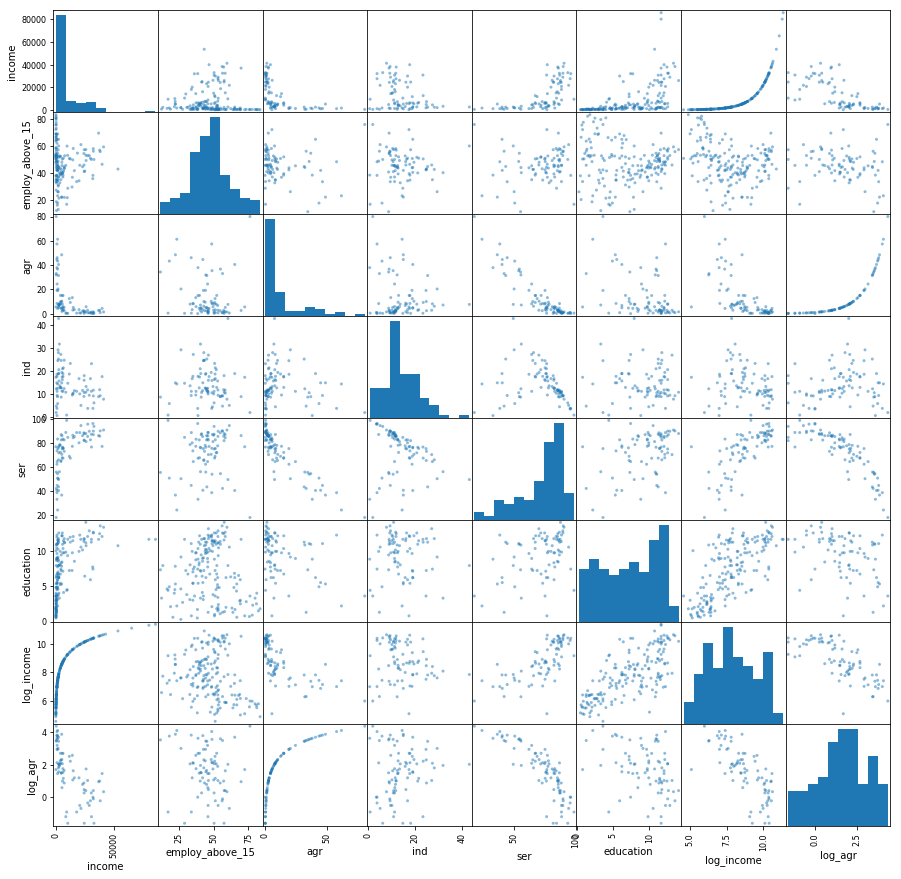

In [86]:
pd.plotting.scatter_matrix(df, figsize=(15, 15));

The most obvious relationships were:

**Positive**
- `log_income` and `education`
- `log_income` and `ser`

**Negative**
- `log_agr` and `ser`
- `log_income` and `log_agr`

### Research Question 1: How does economic strength vary across the globe?

In [87]:
df.log_income.describe()

count    201.000000
mean       7.894677
std        1.636377
min        4.551450
25%        6.441132
50%        7.792687
75%        9.185786
max       11.361436
Name: log_income, dtype: float64

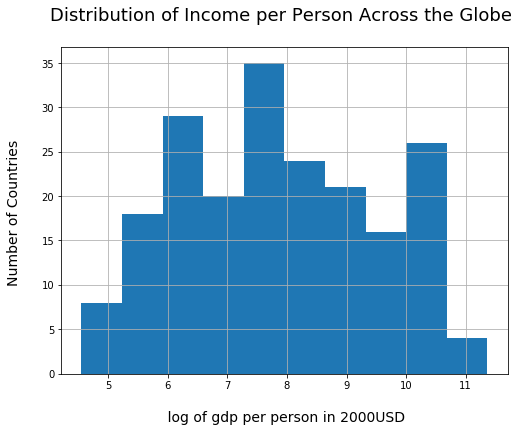

In [90]:
plt.subplots(figsize=(8, 6))
df.log_income.hist()
plt.title("Distribution of Income per Person Across the Globe \n", fontsize=18)
plt.xlabel("\n log of gdp per person in 2000USD", fontsize=14)
plt.ylabel("Number of Countries \n", fontsize=14);

The log of income per person (GDP) ranged from 4.55 to 11.36 with an average of 7.89 across the globe and a relatively normal distribution.

Income per person was then inspected at a country level. 

In [91]:
df.sort_values('log_income', ascending=False, inplace=True)

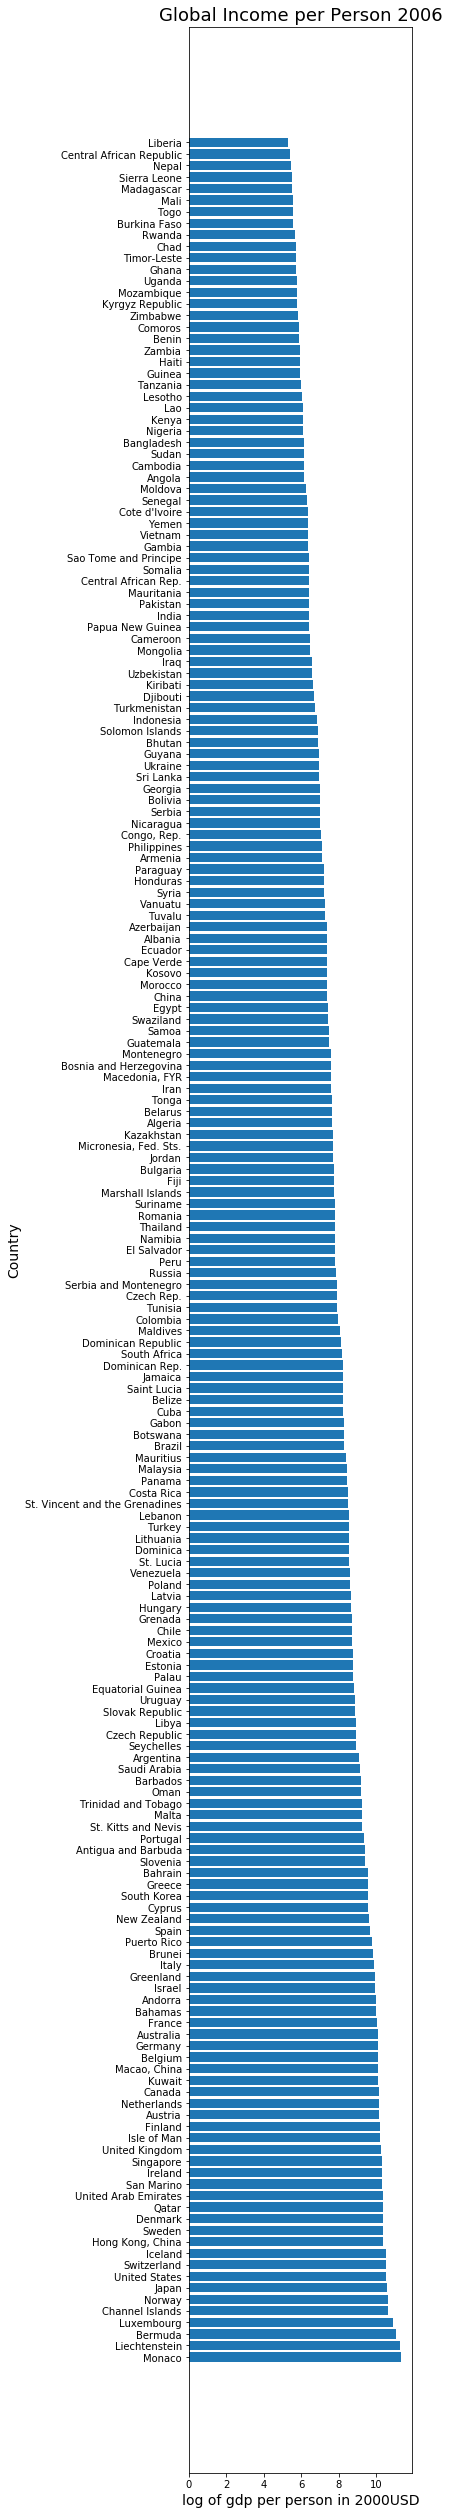

In [92]:
ind = np.arange(len(df.country[:-22]))
labels = list(df.country[:-22])
plt.subplots(figsize=(4, 45))
plt.barh(ind, df.log_income[:-22])
plt.title("Global Income per Person 2006", fontsize=18)
plt.xlabel("log of gdp per person in 2000USD", fontsize=14)
plt.ylabel("Country", fontsize=14)
plt.yticks(ind, labels);

Unfortunately this did not provide a clear means of interpretation and so data was inspected at the regional level.

In [78]:
region_income = df.groupby('region')['log_income']

region_income.mean()

region
Africa                          6.401944
Asia-Pacific                    7.625339
Eastern Europe                  7.923529
Latin America and Caribbean     8.220023
Western Europe and Other       10.153568
non-UN                          9.951948
Name: log_income, dtype: float64

In [95]:
region_income.std()

region
Africa                         1.134137
Asia-Pacific                   1.439356
Eastern Europe                 0.785313
Latin America and Caribbean    0.834286
Western Europe and Other       0.572171
non-UN                         1.115664
Name: log_income, dtype: float64

In [96]:
region_income.max() - region_income.min()

region
Africa                         4.400319
Asia-Pacific                   5.402328
Eastern Europe                 3.167452
Latin America and Caribbean    4.034223
Western Europe and Other       2.813779
non-UN                         3.701956
Name: log_income, dtype: float64

In [79]:
region_income.count()

region
Africa                         54
Asia-Pacific                   50
Eastern Europe                 25
Latin America and Caribbean    35
Western Europe and Other       29
non-UN                          8
Name: log_income, dtype: int64

A function to consistently format a boxplot was created .

Resources consulted to construct chart:
- Fill boxes: https://stackoverflow.com/questions/20289091/python-matplotlib-filled-boxplots
- Individual coloring: https://stackoverflow.com/questions/41997493/python-matplotlib-boxplot-color/41997865

In [85]:
def format_boxplot(format_dict, color):
    '''Formats boxplot after boxplot has been plotted to have box colors according to the color argument.
       With grey whiskers, black caps and white medians and means.
    Args:
        format_dict: formatting dictionary variable.
        color: array like list of colors.
    Returns:
        None.
    '''
    for i in range(len(color)):
        plt.setp(format_dict['boxes'][i], color=color[i])
        
    plt.setp(format_dict['whiskers'], color='grey')
    plt.setp(format_dict['caps'], color='black')
    plt.setp(format_dict['medians'], color='white')
    plt.setp(format_dict['means'], color='white')

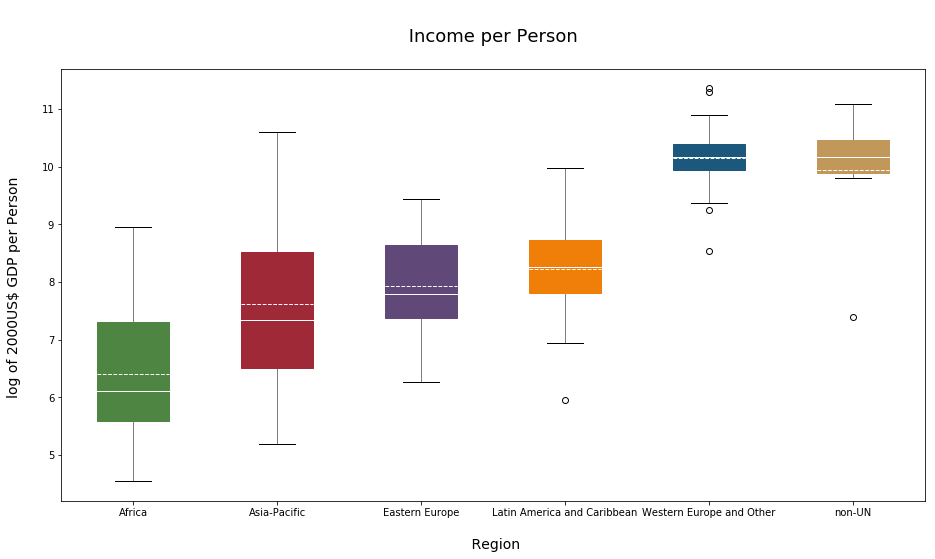

In [57]:
bp = df[['region', 'log_income']].boxplot(by='region', showmeans=True, meanline=True, figsize=(15, 8), patch_artist=True, grid=False, return_type='dict')
plt.title('\n Income per Person \n', fontsize=18)
plt.suptitle("")
plt.xlabel('\n Region', fontsize=14)
plt.ylabel('log of 2000US$ GDP per Person \n', fontsize=14);

#because of the grouping that was used for the boxplot, the formatting dictionary is found in bp['log_income']
format_boxplot(bp['log_income'], color)

**Observations:** Average regional income per person ranged from Africa with the lowest per person income ($\mu$ = 6.42) to Western Europe and Other with the highest per person income ($\mu$ = 10.15). The eight non-UN countries reported income data with the smallest range and a simiar mean of per person income ($\mu$ = 9.95) but a right-skewed dataset. 

Variability in income per person tended to decrease as the mean for the region increased. Africa and Asia-Pacific ($\mu$ = 7.63) had the lowest means and the greatest variability, Eastern Europe ($\mu$ = 7.92) and Latin America and Caribbean ($\mu$ = 8.22) had moderate income per person and variability with the region, and Western Europe and Other had the highest mean income per person and the lowest variabilty for UN regions. 

**Question Answer:** Countries that are economically strong are more likely to be found within the Western Europe and Other region, and less likely to be found in the Africa and Asia-Pacific UN regions.

### Research Question 2: How does women's participation in the workforce vary across the globe?

#### Employment Participation

The female labor force participation rates (FLFP) was examined across the UN regions.

In [116]:
region_employ = df.groupby('region')['employ_above_15']

region_employ.mean()

region
Africa                         52.914000
Asia-Pacific                   43.895555
Eastern Europe                 44.018182
Latin America and Caribbean    46.096296
Western Europe and Other       48.908000
non-UN                         39.822223
Name: employ_above_15, dtype: float64

In [117]:
region_employ.std()

region
Africa                         17.071017
Asia-Pacific                   16.992404
Eastern Europe                  6.432446
Latin America and Caribbean     9.333335
Western Europe and Other       10.593745
non-UN                         13.067687
Name: employ_above_15, dtype: float64

In [118]:
region_employ.max() - region_employ.min()

region
Africa                         65.500002
Asia-Pacific                   65.799998
Eastern Europe                 28.500000
Latin America and Caribbean    33.600002
Western Europe and Other       47.399998
non-UN                         45.900002
Name: employ_above_15, dtype: float64

In [119]:
region_employ.count()

region
Africa                         54
Asia-Pacific                   45
Eastern Europe                 25
Latin America and Caribbean    27
Western Europe and Other       25
non-UN                          9
Name: employ_above_15, dtype: int64

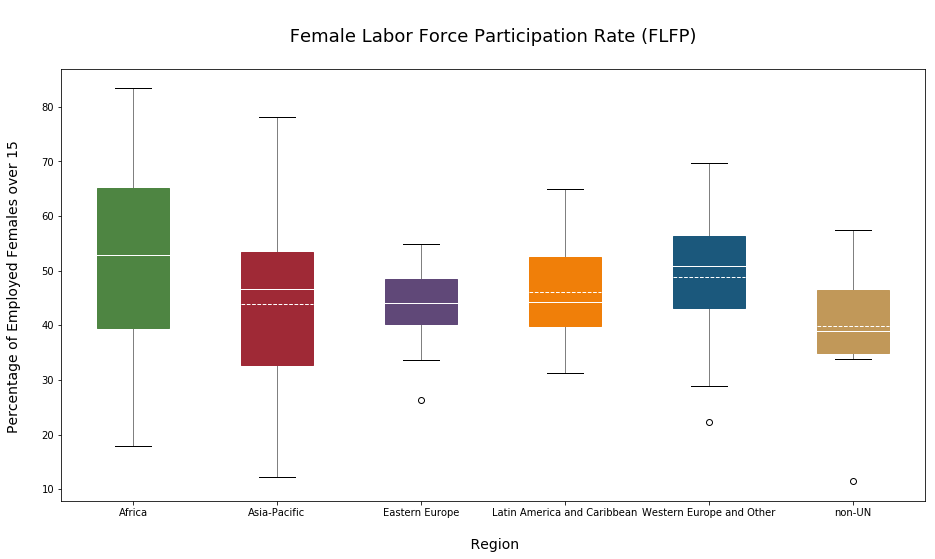

In [64]:
bp = df[['region', 'employ_above_15']].boxplot(by='region', showmeans=True, meanline=True, figsize=(15, 8), patch_artist=True, grid=False, return_type='dict')
plt.title('\n Female Labor Force Participation Rate (FLFP) \n', fontsize=18)
plt.suptitle("")
plt.xlabel('\n Region', fontsize=14)
plt.ylabel('Percentage of Employed Females over 15 \n', fontsize=14);

format_boxplot(bp['employ_above_15'], color)

In [68]:
df.query('region == "non-UN"')

,country,income,employ_above_15,agr,ind,ser,education,region,log_income,log_agr
19,Bermuda,65430.60131,NaN,NaN,NaN,NaN,NaN,non-UN,11.088745,NaN
33,Cayman Islands,NaN,NaN,1.000000,3.6,95.500000,NaN,non-UN,NaN,0.000000
37,Channel Islands,42994.34591,NaN,NaN,NaN,NaN,NaN,non-UN,10.668824,NaN
72,Greenland,20556.63474,NaN,NaN,NaN,NaN,NaN,non-UN,9.930939,NaN
74,Guadeloupe,NaN,39.000000,NaN,NaN,NaN,NaN,non-UN,NaN,NaN
81,"Hong Kong, China",32952.71213,50.200001,0.200000,6.3,93.500000,NaN,non-UN,10.402829,-1.609438
89,Isle of Man,27612.48388,NaN,0.700000,3.9,95.400002,NaN,non-UN,10.226023,-0.356675
100,Kosovo,1614.51344,NaN,NaN,NaN,NaN,NaN,non-UN,7.386789,NaN
114,"Macao, China",24595.65317,57.400002,0.200000,18.1,81.699997,NaN,non-UN,10.110325,-1.609438
123,Martinique,NaN,38.900002,NaN,NaN,NaN,NaN,non-UN,NaN,NaN


**Observations:** While the average FLFP of the UN regions were relatively close, ranging from 43.9% in Asia-Pacific to 52.9% in Africa, the variability of FLFP ranged greatly between the regions. Eastern Europe had the most consistency of FLFP and Africa and Asia-Pacific had the greatest variability. 

In addition, because the UN regions are ordered by increasing income per person in the above chart, it possible to make some comparisons relative to income per person from the FLFP boxplots. It can be seen that as income per person increases that variability shrinks a range of approximately 20% between the countries in Eastern Europe, and then grows again with increasing income per person. 

That is, if income per person is kept in mind, when considering the UN regions, this figure gives an indication of the U-shaped relationship between income per person and FLFP. (It is not possible to make a comparison between how the non-UN coutnries' FLFP compares to their income per person because the data for each variable is typically not shared with the other.)

**Question Answer:** The greatest participation of women in the workforce is found in the African and Western Europe and Other regions. For the countries that reported, females are the least likely to participate in the workforce when their country is not part of the UN, but of the UN regions, FLFP is lowest in the Asia-Pacific and Eastern Europe regions. When considering the UN regions labor force participation does appear to align with a U-shaped correlation with economic strength.

#### Employment Sector

Female participation in the agricultural, industrial and service sectors across UN regions. 

In [5]:
region_agr = df.groupby('region')['agr']
region_ind = df.groupby('region')['ind']
region_ser = df.groupby('region')['ser']

region_agr.mean()

region
Africa                         34.142857
Asia-Pacific                   16.684616
Eastern Europe                 18.066667
Latin America and Caribbean     6.511765
Western Europe and Other        4.841667
non-UN                          6.133333
Name: agr, dtype: float64

In [6]:
region_ind.mean()

region
Africa                         12.271428
Asia-Pacific                   13.761538
Eastern Europe                 19.216667
Latin America and Caribbean    15.000000
Western Europe and Other       12.287500
non-UN                          8.666667
Name: ind, dtype: float64

In [7]:
region_ser.mean()

region
Africa                         50.557143
Asia-Pacific                   66.784616
Eastern Europe                 62.611111
Latin America and Caribbean    79.364706
Western Europe and Other       82.591667
non-UN                         84.966667
Name: ser, dtype: float64

In [8]:
region_total = region_agr.mean() + region_ind.mean() + region_ser.mean()
region_total

region
Africa                          96.971428
Asia-Pacific                    97.230770
Eastern Europe                  99.894444
Latin America and Caribbean    100.876471
Western Europe and Other        99.720833
non-UN                          99.766667
dtype: float64

In [13]:
other = 100 - region_total
other

region
Africa                         3.028572
Asia-Pacific                   2.769230
Eastern Europe                 0.105556
Latin America and Caribbean   -0.876471
Western Europe and Other       0.279167
non-UN                         0.233333
dtype: float64

In [14]:
other.loc['Latin America and Caribbean'] = 0
other

region
Africa                         3.028572
Asia-Pacific                   2.769230
Eastern Europe                 0.105556
Latin America and Caribbean    0.000000
Western Europe and Other       0.279167
non-UN                         0.233333
dtype: float64

Counts by regions were conducted to determine comparability of information.

In [77]:
df[['region', 'ser', 'ind', 'ser']].groupby('region').count()

,ser,ind,ser
region,,,
Africa,7,7,7
Asia-Pacific,13,13,13
Eastern Europe,18,18,18
Latin America and Caribbean,17,17,17
Western Europe and Other,24,24,24
non-UN,6,6,6


The amount of available data for employment secors was compared to the amount regional data for income.

In [82]:
df.groupby('region')['ser'].count()/region_income.count()*100

region
Africa                         12.962963
Asia-Pacific                   26.000000
Eastern Europe                 72.000000
Latin America and Caribbean    48.571429
Western Europe and Other       82.758621
non-UN                         75.000000
dtype: float64

While it was not confirmed whether the same countries were reporting, the number of countries reporting employment sector information was substantially reduced for the Africa, Asia-Pacific and Latin America and Caribbean regions. As such, confidence in region-specific analysi for these regions is limited.

In addition, because Eastern Europe and Western Europe and Other are comparatively over represented, caution should be made when interpreting relationships between employment sectors and other variables.

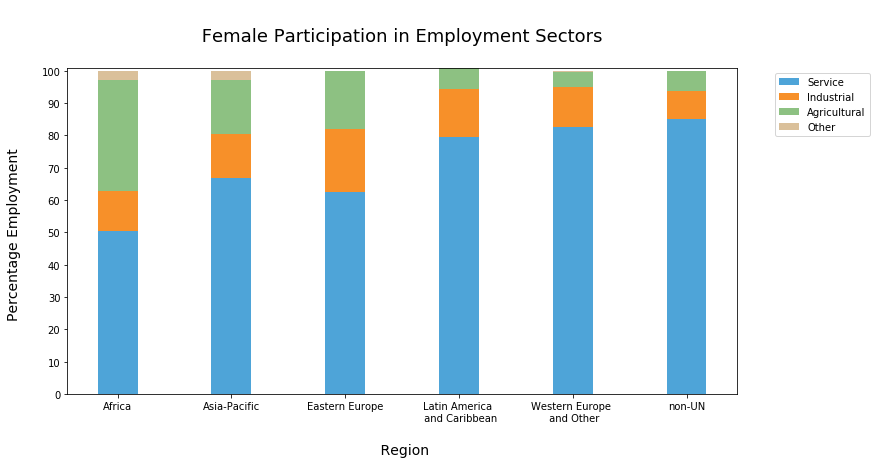

In [23]:
N = 6
service = region_ser.mean()
industry = region_ind.mean()
agriculture = region_agr.mean()
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

plt.subplots(figsize=(12, 6))
p1 = plt.bar(ind, service, width, color='#4ea4d8')
p2 = plt.bar(ind, industry, width, bottom=service, color='#f79029')
p3 = plt.bar(ind, agriculture, width, bottom=industry+service, color='#8dc182')
p4 = plt.bar(ind, other, width, bottom=agriculture+industry+service, color='#dac09a')

plt.title('\n Female Participation in Employment Sectors \n', fontsize=18)
plt.xlabel('\n Region', fontsize=14)
plt.ylabel('Percentage Employment \n', fontsize=14)
plt.xticks(ind, ('Africa', 'Asia-Pacific', 'Eastern Europe', 'Latin America \n and Caribbean', 'Western Europe \n and Other', 'non-UN'))
plt.yticks(np.arange(0, 101, 10))
plt.legend((p1[0], p2[0], p3[0], p4[0]), ('Service', 'Industrial', 'Agricultural', 'Other'), bbox_to_anchor=(1.05, 1));

**Observations:** Africa had the largest proportion of women participating in the Agricultural sector, with over one-third of females employed in this sector. In all other regions the proportion of females employed in the Agricultural sector was less than 20%. Africa also had the smallest proportion of females in the Service sector, with just over half of employed women working in this sector. The remaining regions typically had more than two-thirds of females employed in the Service sector, with the highest proportion of females employed in the Service sector.

The Latin America and Caribbean, Western Europe and Other regions had the largest proportion of females working in the Service sector. 

Eastern Europe differs from all other regions with the largest relative amount of females employed in the industrial sector. It also has the second highest proportion of females employed in the Agricultural sector.

(The data for the Latin America and Caribbean region was slightly adjusted to accommodate for the sum of the sectors greater than 100%)

**Question Answer:** The type of employment females participate in appears related to economic strength, with greater participation in service industries associated with economic strength.

### Research Question 3: How does women's participation in education vary across the globe?

In [147]:
region_education = df.groupby('region')['education']

region_education.mean()

region
Africa                          3.298077
Asia-Pacific                    6.461702
Eastern Europe                 11.044000
Latin America and Caribbean     7.821429
Western Europe and Other       11.237931
non-UN                          8.800000
Name: education, dtype: float64

In [148]:
region_education.std()

region
Africa                         2.289661
Asia-Pacific                   3.354527
Eastern Europe                 1.325418
Latin America and Caribbean    2.075672
Western Europe and Other       1.818244
non-UN                         2.121320
Name: education, dtype: float64

In [149]:
region_education.max() - region_education.min()

region
Africa                         10.6
Asia-Pacific                   11.7
Eastern Europe                  6.1
Latin America and Caribbean     8.9
Western Europe and Other        8.7
non-UN                          3.0
Name: education, dtype: float64

In [150]:
region_education.count()

region
Africa                         52
Asia-Pacific                   47
Eastern Europe                 25
Latin America and Caribbean    28
Western Europe and Other       29
non-UN                          2
Name: education, dtype: int64

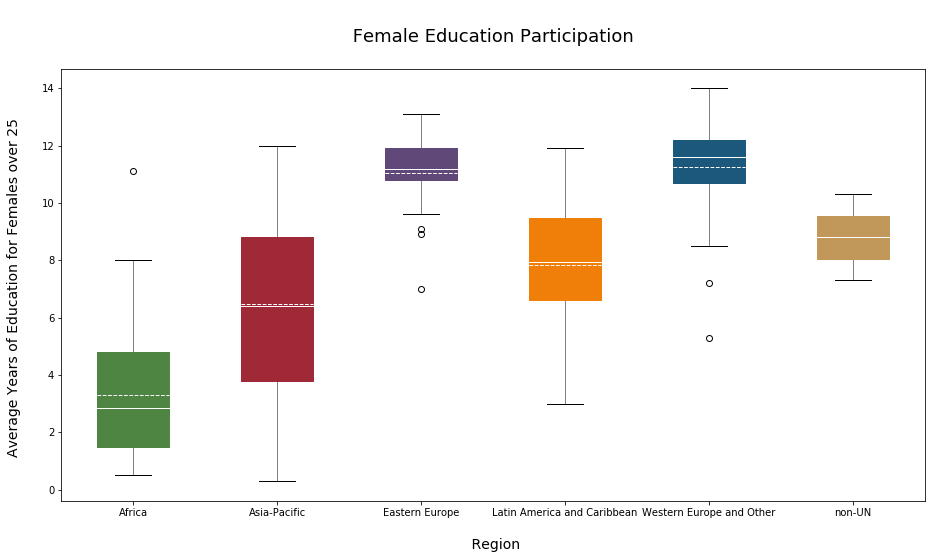

In [86]:
bp = df[['region', 'education']].boxplot(by='region', showmeans=True, meanline=True, figsize=(15, 8), patch_artist=True, grid=False, return_type='dict')
plt.title('\n Female Education Participation \n', fontsize=18)
plt.suptitle("")
plt.xlabel('\n Region', fontsize=14)
plt.ylabel('Average Years of Education for Females over 25 \n', fontsize=14);

format_boxplot(bp['education'], color)

**Observations:** Apart from Eastern Europe, the regions were arranged in order of increasing female education participation, with Africa with the lowest female education participation ($\mu$ = 3.30 years) and Western Europe with the highest female education participation ($\mu$ = 11.24), in line with increasing economic strength. 

Instead, Eastern Europe was most similar to Western Europe and Other in terms of female education participation ($\mu$ = 11.04) and also had the least variance in female education participation, followed by Western Europe and Other. These were the only two regions that had countries with average years of education completed by females over 12.

The Asia-Pacific region had the greatest variability in female education participation.

Only two countries that are not in the UN have information regarding the particiaption of females in education.

**Question Answer:** Generally the pattern of participation in education for females follows that of relative economic strength. The region that does not follow this trend is Eastern Europe, with a far greater participation in education for females compared to the region's economic strength.

### Research Question 4: Does the data support a theory of a U-shaped relationship between FLFP and economic strength?

To test the hypothesized U-shaped relationship between a country's FLFP and economic strength the countries were split into third quantiles of economic strength - low, medium, and high. 

The labor force participation was then compared between these three categories utilizing an one-way ANOVA to confirm variation across the regions.

Three [Bonferroni corrected](https://en.wikipedia.org/wiki/Bonferroni_correction) t-tests ( $p_i \, \leqslant \, \frac{\alpha}{m}$, $\alpha$ = 0.05) were planned to compare each of the categories to test the following hypotheses.

1. Countries of high and low economic strength will show higher FLFP than those of medium economic strength. 
2. The FLFP of countries of high and low economic strength will be similar.

The categories were created, removing missing values on a pair-wise basis.

In [165]:
low = df.query('log_income <= {}'.format(df.log_income.quantile(0.33))).employ_above_15.dropna()
med = df.query('log_income > {} and log_income <= {}'.format(df.log_income.quantile(0.33), df.log_income.quantile(0.66))).employ_above_15.dropna()
high = df.query('log_income > {}'.format(df.log_income.quantile(0.66))).employ_above_15.dropna()

The categorization procedure was checked to confirm that all relevant missing values were removed.

In [166]:
low.isnull().sum(), med.isnull().sum(), high.isnull().sum()

(0, 0, 0)

In [167]:
low.count(), med.count(), high.count()

(63, 54, 55)

These values confirmed that all pairs of `log_income` and `employ_above_15` that had missing values were removed but no rows with missing values in other variables were removed.

In [168]:
low_mean = low.mean()
med_mean = med.mean()
high_mean = high.mean()

low_mean, med_mean, high_mean

(54.629526417435805, 40.909595873526946, 46.300584983026454)

The means suggested that the first hypothesis was supported but the second hypothesis may not be supported.

The standard deviations of the categories were measured to confirm that the assumptions of equal population variance of ANOVA and t-tests were met.

In [169]:
low_std = low.std()
med_std = med.std()
high_std = high.std()

low_std, med_std, high_std

(15.397118343387936, 12.31751163383859, 10.584686263945386)

The standard deviations were considered sufficiently similar to assume populations of equal variance.

A one-way ANOVA was conducted to confirm the presence of a difference between the categories.

In [171]:
F, p = stats.f_oneway(low, med, high)
F, p

(16.502527625865245, 2.8399940614430066e-07)

The results of the ANOVA confirmed that there was a difference between the categories and so the planned two-tailed independent t-tests were conducted using a Bonferroni correction of $\alpha$ = 0.01667.

In [172]:
0.05/3

0.016666666666666666

The following comparisons were made: 
1. low v. medium
2. medium v. high
3. low v. high

In [173]:
t, p = stats.ttest_ind(low, med)
t, p

(5.261181763260201, 6.710001010512405e-07)

In [174]:
t, p = stats.ttest_ind(med, high)
t, p

(-2.452179531823886, 0.01581663150300652)

In [175]:
t, p = stats.ttest_ind(low, high)
t, p

(3.3747200290796973, 0.0010055043023795595)

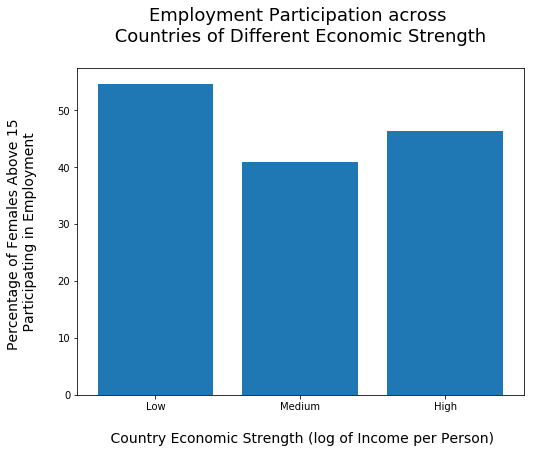

In [176]:
locations = [1, 2, 3]
heights = [low_mean, med_mean, high_mean]
labels = ['Low', 'Medium', 'High']
plt.subplots(figsize=(8, 6))
plt.bar(locations, heights, tick_label=labels)
plt.title('Employment Participation across \n Countries of Different Economic Strength \n', fontsize=18)
plt.xlabel('\n Country Economic Strength (log of Income per Person)', fontsize=14)
plt.ylabel('Percentage of Females Above 15 \n Participating in Employment \n', fontsize=14);

**Question Answer:** The t-tests supported the presence of a U-shaped relationship between country economic strength and FLFP. However, each of the categories were shown to have different FLFP. For countries of low economic strength the FLFP was an average of 54.6%, for those of medium economic strength the FLFP was an average of 40.9%, and for countries of high economic strength the FLFP was an average of 46.3%.

### Research Question 5: Does the data show a relationship between employment sector and economic strength?

Correlations were calculated between `log_income` and the three employment sector statistics: `log_agr`, `ind` and `ser`.

In [177]:
df[['log_income', 'log_agr', 'ind', 'ser']].corr()

,log_income,log_agr,ind,ser
log_income,1.000000,-0.738427,-0.165550,0.716163
log_agr,-0.738427,1.000000,0.121209,-0.832298
ind,-0.165550,0.121209,1.000000,-0.217945
ser,0.716163,-0.832298,-0.217945,1.000000


The same procedure previously used for pair-wise deletion was used for testing the significance of the correlations.

In [178]:
inc_agr = df[['log_income', 'log_agr']].dropna()
r, p = stats.pearsonr(inc_agr['log_income'], inc_agr['log_agr'])
r, p

(-0.7384270538419712, 3.632262377835879e-15)

[This](http://widu.tumblr.com/post/43624347354/matplotlib-trendline) resource was utilized to plot a scatter plot with a trendline.

y = -0.854762x + 9.037421


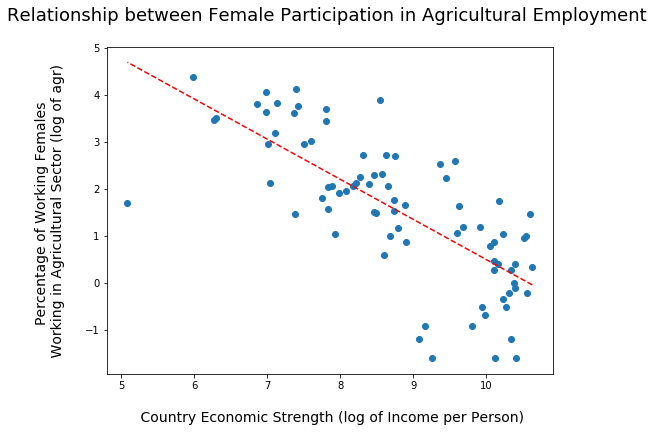

In [180]:
x = inc_agr['log_income']
y = inc_agr['log_agr']
plt.subplots(figsize=(8, 6))
plt.scatter(x, y)
plt.title('Relationship between Female Participation in Agricultural Employment \n', fontsize=18)
plt.xlabel('\n Country Economic Strength (log of Income per Person)', fontsize=14)
plt.ylabel('Percentage of Working Females \n Working in Agricultural Sector (log of agr) \n', fontsize=14);

def trendline(x, y):
    # calc the trendline
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    plt.plot(x,p(x),"r--")
    # the line equation:
    print("y = %.6fx + %.6f"%(z[0],z[1]))

trendline(x, y)

The test showed that there was a logarithmic negative correlation (r = -0.738) between the rate of female participation in agricultural sector employment and a country's economic strength. 

That is, countries with higher economic strength have less women working in agricultural sectors.

To view the logarithmic relationship between the log of economic strength and female pariticipation in the agricultural sector a scatter plot of `arg` and `log_income` was completed.

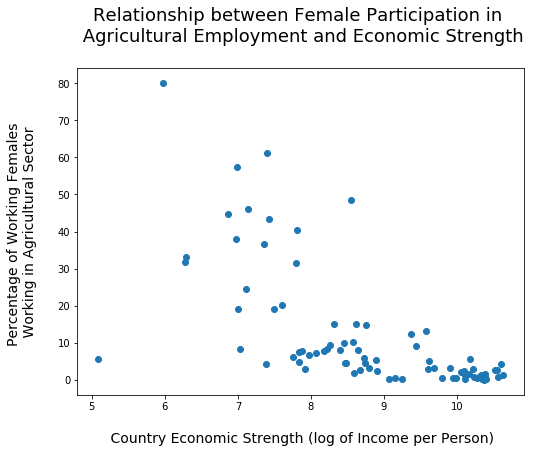

In [200]:
inc_agr = df[['log_income', 'agr']].dropna()
x = inc_agr['log_income']
y = inc_agr['agr']
plt.subplots(figsize=(8, 6))
plt.scatter(x, y)
plt.title('Relationship between Female Participation in \n Agricultural Employment and Economic Strength\n', fontsize=18)
plt.xlabel('\n Country Economic Strength (log of Income per Person)', fontsize=14)
plt.ylabel('Percentage of Working Females \n Working in Agricultural Sector \n', fontsize=14);

The correlation appeared to be due to increasing variation in participation in the agricultural sector for countries of lower economic strength, with less variation for countries of higher economic strength.

In [182]:
inc_ind = df[['log_income', 'ind']].dropna()
r, p = stats.pearsonr(inc_ind['log_income'], inc_ind['ind'])
r, p

(-0.16555032248751456, 0.13967364180956293)

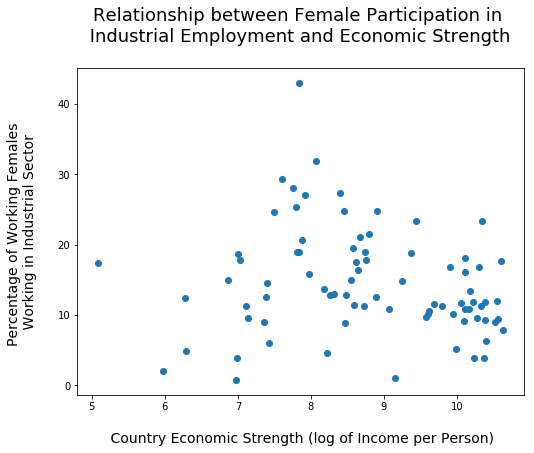

In [201]:
x = inc_ind['log_income']
y = inc_ind['ind']
plt.subplots(figsize=(8, 6))
plt.scatter(x, y)
plt.title('Relationship between Female Participation in \n Industrial Employment and Economic Strength \n', fontsize=18)
plt.xlabel('\n Country Economic Strength (log of Income per Person)', fontsize=14)
plt.ylabel('Percentage of Working Females \n Working in Industrial Sector \n', fontsize=14);

There was no relationship observed between a country's economic strength and female participation in the industrial sector.

In [184]:
inc_ser = df[['log_income', 'ser']].dropna()
r, p = stats.pearsonr(inc_ser['log_income'], inc_ser['ser'])
r, p

(0.7161625997124368, 5.663619433191525e-14)

y = 9.750091x + -12.592435


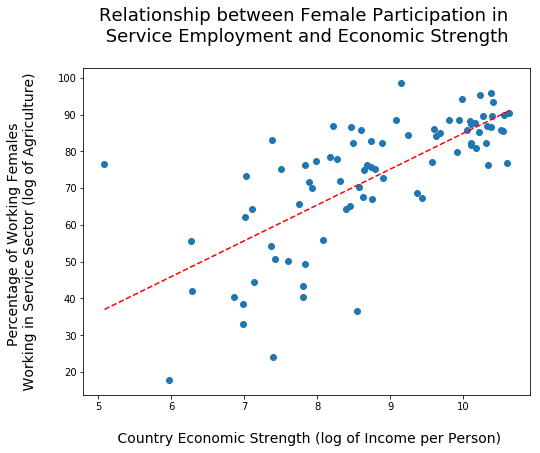

In [202]:
x = inc_ser['log_income']
y = inc_ser['ser']
plt.subplots(figsize=(8, 6))
plt.scatter(x, y)
plt.title('Relationship between Female Participation in \n Service Employment and Economic Strength \n', fontsize=18)
plt.xlabel('\n Country Economic Strength (log of Income per Person)', fontsize=14)
plt.ylabel('Percentage of Working Females \n Working in Service Sector (log of Agriculture) \n', fontsize=14);
trendline(x, y)

The test showed that there is a positive correlation (r = 0.716) between the rate of female participation in service sector employment and a country's economic strength.

That is, countries with higher economic strength have more women working in service sectors.

**Question Answer:** There are relationships between female participation in the agricultural and service sectors and a country's economic strength. Countries of higher economic strength are more likely to have high employment of females in the service sector and low employment in the agricultural sector. The participation of females in the industrial sector ranges up to approximately 30% across countries.

### Research Question 6: Is there a positive relationship between economic strength and female education participation?

The correlation between a country's economic strength and female education participation was tested.

In [186]:
inc_ed = df[['log_income', 'education']].dropna()
r, p = stats.pearsonr(inc_ed['log_income'], inc_ed['education'])
r, p

(0.7222013723773816, 1.6799516026557831e-29)

y = 1.701621x + -6.023318


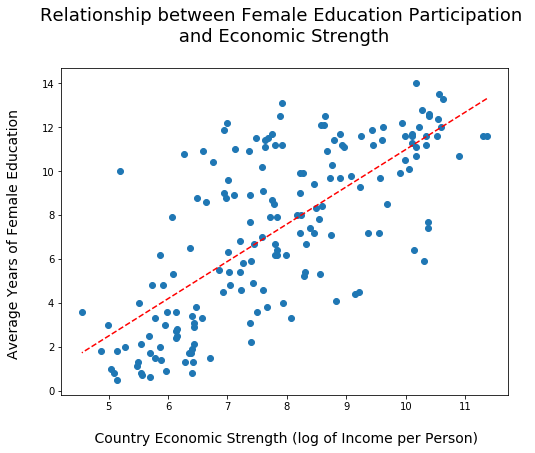

In [189]:
x = inc_ed['log_income']
y = inc_ed['education']
plt.subplots(figsize=(8, 6))
plt.scatter(x, y)
plt.title('Relationship between Female Education Participation \n and Economic Strength \n', fontsize=18)
plt.xlabel('\n Country Economic Strength (log of Income per Person)', fontsize=14)
plt.ylabel('Average Years of Female Education \n', fontsize=14);
trendline(x, y)

**Question answer:** There was a highly significant positive correlation (r = 0.722) between a country's economic strength and female participation in education.

### Research Question 7: Does the data show relationships between education participation and FLFP, including in the three employment sectors?

#### Overall labor force participation

Correlations between `education`, `employ_above_15`, `log_agr`, `ind`, and `ser` were tested, with pair-wise deletions completed for each correlation to manage missing values.

In [190]:
df[['education', 'employ_above_15', 'log_agr', 'ind', 'ser']].corr()

,education,employ_above_15,log_agr,ind,ser
education,1.000000,-0.101378,-0.385708,-0.036428,0.412897
employ_above_15,-0.101378,1.000000,-0.151565,-0.028817,0.139093
log_agr,-0.385708,-0.151565,1.000000,0.121209,-0.832298
ind,-0.036428,-0.028817,0.121209,1.000000,-0.217945
ser,0.412897,0.139093,-0.832298,-0.217945,1.000000


In [191]:
ed_employ = df[['education', 'employ_above_15']].dropna()
r, p = stats.pearsonr(ed_employ['education'], ed_employ['employ_above_15'])
r, p

(-0.1013784223873291, 0.18574145955921578)

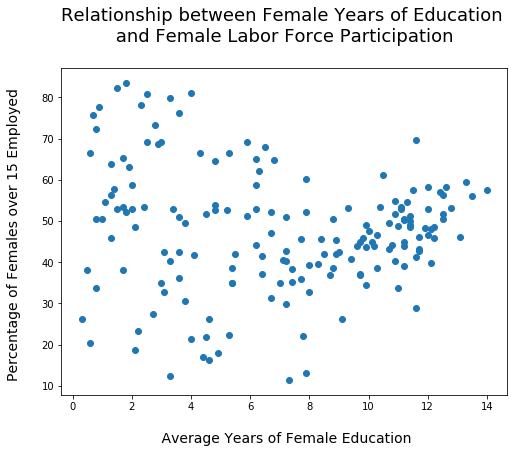

In [193]:
x = ed_employ['education']
y = ed_employ['employ_above_15']
plt.subplots(figsize=(8, 6))
plt.scatter(x, y)
plt.title('Relationship between Female Years of Education \n and Female Labor Force Participation \n', fontsize=18)
plt.xlabel('\n Average Years of Female Education', fontsize=14)
plt.ylabel('Percentage of Females over 15 Employed \n', fontsize=14);

It was identified that the pattern of the relationship between education participation and FLFP looked similar to the relationship between economic strength and FLFP. A one-way ANOVA was conducted to confirm a difference between low, medium and high education after confirming the suitability of the data.

In [194]:
low = df.query('education <= {}'.format(df.education.quantile(0.33))).employ_above_15.dropna()
med = df.query('education > {} and education <= {}'.format(df.education.quantile(0.33), df.education.quantile(0.66))).employ_above_15.dropna()
high = df.query('education > {}'.format(df.education.quantile(0.66))).employ_above_15.dropna()

low_mean = low.mean()
med_mean = med.mean()
high_mean = high.mean()

low_std = low.std()
med_std = med.std()
high_std = high.std()

print(low_mean, med_mean, high_mean)
print(low_std, med_std, high_std)

50.807016145770504 42.748538932329545 48.74818818648925
19.557996927645807 12.825957773770819 7.337333254639281


In [195]:
F, p = stats.f_oneway(low, med, high)
F, p

(4.882688943766138, 0.008679171829892867)

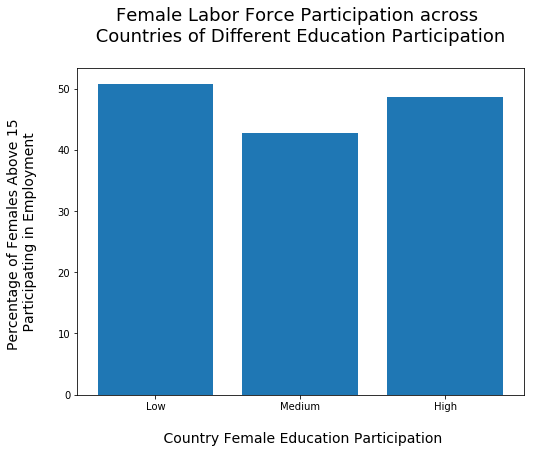

In [196]:
locations = [1, 2, 3]
heights = [low_mean, med_mean, high_mean]
labels = ['Low', 'Medium', 'High']
plt.subplots(figsize=(8, 6))
plt.bar(locations, heights, tick_label=labels)
plt.title('Female Labor Force Participation across \n Countries of Different Education Participation \n', fontsize=18)
plt.xlabel('\n Country Female Education Participation', fontsize=14)
plt.ylabel('Percentage of Females Above 15 \n Participating in Employment \n', fontsize=14);

**Question Answer:** The ANOVA confirmed a similar U-shaped pattern, with the FLFP for countries of low ($\mu$ = 50.8) and high ($\mu$ = 48.7) female education higher than countries of medium female education ($\mu$ = 42.7).

#### Employment Sector

The correlations between education and the employment sector participations for females were tested.

In [197]:
ed_agr = df[['education', 'log_agr']].dropna()
r, p = stats.pearsonr(ed_agr['education'], ed_agr['log_agr'])
r, p

(-0.38570758121152227, 0.0004103376545600071)

y = -0.180426x + 3.416634


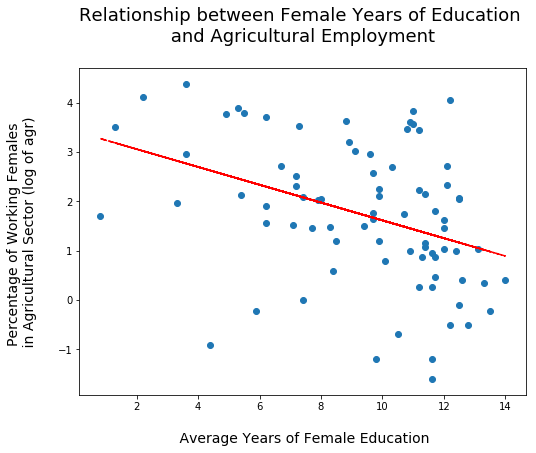

In [199]:
x = ed_agr['education']
y = ed_agr['log_agr']
plt.subplots(figsize=(8, 6))
plt.scatter(x, y)
plt.title('Relationship between Female Years of Education \n and Agricultural Employment \n', fontsize=18)
plt.xlabel('\n Average Years of Female Education', fontsize=14)
plt.ylabel('Percentage of Working Females \n in Agricultural Sector (log of agr) \n', fontsize=14);
trendline(x, y)

The test showed that there is a moderate logarithmic negative correlation (r = -0.386) between the female education participation and female agricultural sector employment.

That is, countries with higher female education have less women working in agricultural sectors.

To view the logarithmic relationship between education and female pariticipation in the agricultural sector a scatter plot of `arg` and `education` was completed.

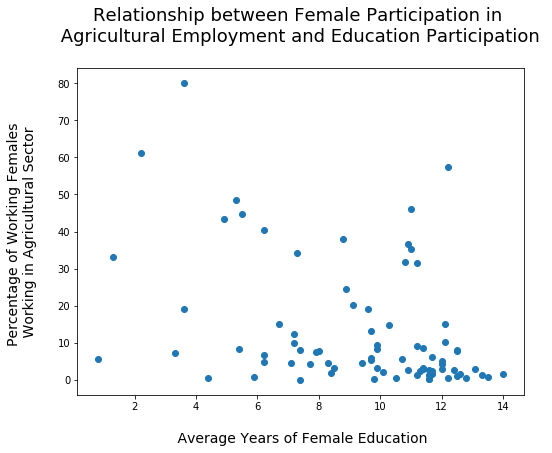

In [203]:
ed_agr = df[['education', 'agr']].dropna()
x = ed_agr['education']
y = ed_agr['agr']
plt.subplots(figsize=(8, 6))
plt.scatter(x, y)
plt.title('Relationship between Female Participation in \n Agricultural Employment and Education Participation \n', fontsize=18)
plt.xlabel('\n Average Years of Female Education', fontsize=14)
plt.ylabel('Percentage of Working Females \n Working in Agricultural Sector \n', fontsize=14);

The correlation appeared to be due to some increasing variation in participation in the agricultural sector for countries of lower female education, with less variation for countries of higher female education.

In [204]:
ed_ind = df[['education', 'ind']].dropna()
r, p = stats.pearsonr(ed_ind['education'], ed_ind['ind'])
r, p

(-0.036428459155588615, 0.7483585289705219)

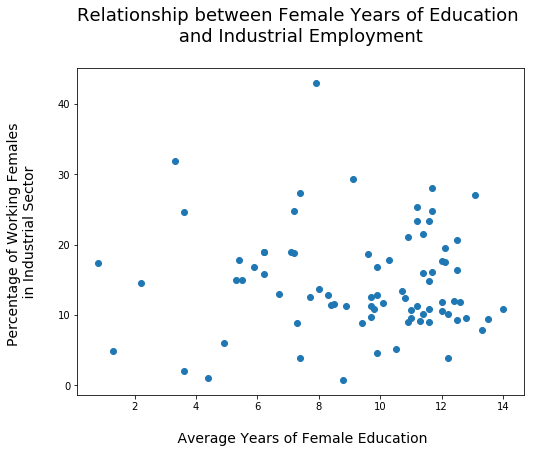

In [205]:
x = ed_ind['education']
y = ed_ind['ind']
plt.subplots(figsize=(8, 6))
plt.scatter(x, y)
plt.title('Relationship between Female Years of Education \n and Industrial Employment \n', fontsize=18)
plt.xlabel('\n Average Years of Female Education', fontsize=14)
plt.ylabel('Percentage of Working Females \n in Industrial Sector \n', fontsize=14);

There was no relationship observed between a country's female education participation and female participation in the industrial sector.

In [206]:
ed_ser = df[['education', 'ser']].dropna()
r, p = stats.pearsonr(ed_ser['education'], ed_ser['ser'])
r, p

(0.41289676054617214, 0.0001410942022036824)

y = 2.401801x + 49.213640


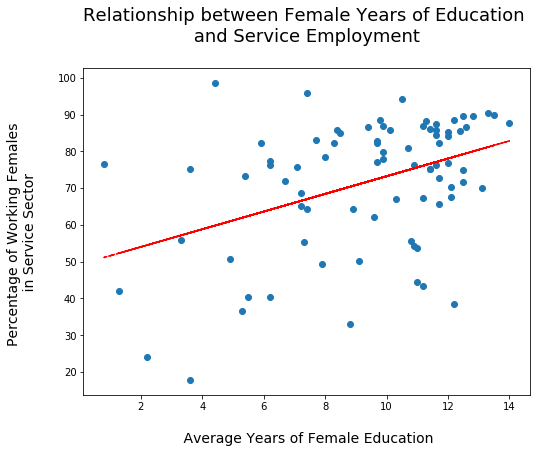

In [207]:
x = ed_ser['education']
y = ed_ser['ser']
plt.subplots(figsize=(8, 6))
plt.scatter(x, y)
plt.title('Relationship between Female Years of Education \n and Service Employment \n', fontsize=18)
plt.xlabel('\n Average Years of Female Education', fontsize=14)
plt.ylabel('Percentage of Working Females \n in Service Sector \n', fontsize=14);
trendline(x, y)

The test showed that there was a moderate positive correlation (r = 0.413) between the rate of female participation in service sector employment and a country's female education participation.

That is, countries with higher female education participation have more women working in service sectors.

**Question Answer:** The relationships between female education participation and female participation in the three employment sectors is similar but less strong than the relationships between the employment sectors participation and a country's economic strength. 

Countries of higher female education are more likely to have high employment of females in the service sector and low employment in the agricultural sector. The participation of females in the industrial sector ranges up to approximately 30% across countries.

<a id='conclusions'></a>
## Conclusions

### Overview
The following relationships were found:
1. A U-shaped relationship between a country's economic strength and female labor force participation, supporting the findings of the ILO report
2. A negative logarithmic relationship between a country's economic strength and female agricultural sector employment
3. A positive relationship between a country's economic strength and female service sector employment
4. A positive relationship between a country's economic strength and female education
5. A similar pattern of relationship, with reduced correlations between education and all employment variables

#### Regional Data

**Region** | **Income** | **FLFP** | **Agr.** | **Ind.** | **Ser.** | **Education**
--- | --- | --- | --- | --- | --- | ---
**Africa** | 6.40 | 52.9 | 34.1 | 12.3 | 50.6 | 3.3
**Asia-Pacific** | 7.63 | 43.9 | 16.7 | 13.8 | 66.8 | 6.5
**Eastern Europe** | 7.92 | 44.0 | 18.1 | 19.2 | 62.6 | 11.0
**Latin American and Caribbean** | 8.22 | 46.1 | 6.5 | 15.0 | 79.4 | 7.8
**Western Europe and Other** | 10.15 | 48.9 | 4.8 | 12.3 | 82.6 | 11.2
**non-UN** | 9.95 | 39.8 | 6.1 | 8.7 | 85.0 | 8.8

### Impact of Education
Based on the regional data, female education participation suggests that some of the reduced correlation strength for education results from Eastern Europe's high education participation does not match it's lower economic strength and labor force participation. One hypothesis for Eastern Europe's increased participation in education in comparison to its relative economic strength is that female education participation rates are influenced by the countries' close location to Western European countries.

Some of the reduced correlation may also be due to the varying impact of increased education on FLFP based on age (as indicated in the ILO report), but the data was not available to investigate this.

However, the data did support the findings of the ILO report that increased education is typically associated with more favorable employment conditions with as shown by greater female education being associated with less participation in agriculture and more in service employment.

### Type of Employment
The data supported the ILO findings of a relationship between economic health and the type of employment participation for females, however, it did not show a sequential progression of agricultural to industrial to service sector employment. Instead, the data showed the expected relationships for agricultural  (negative) and service (positive) sector employment in relation to economic health, but no relationship for industrial employment compared to economic health.

Eastern Europe's disproportionality high participation for female in industrial employment suggests that factors beyond country economic strength and education influence the type of employment participation. One hypothesis is that political ideologies may also influence the type of work that is available within a country.

### Limitations
More information was available for higher economically developed countries than lower economically developed countries and this may distort the results, especially with comparisons related to employment sectors. 

While theories exist regarding the causality of the results, the data was unable to support a determination regarding the direction of the causality between female access to employment and economic strength because longitudinal data was not included.  The increased education for Eastern Europe region countries suggested that increased education access may precede increased economic strength but this could not be confirmed definitively. 

Another limitation of the current data is the intentional exclusion of data related to male participation in employment and education. As such it is not possible to determine whether the pattern of employment, education and economic strength for females is similar to that for the general population, or males (and therefore not a product of gender), or whether female particiapation in employment and education have an additional contribution to a country's economic strength. 